#### **info**
How we will proceed 
-  Univarite analysis of each column
-  conclusion of each column below it 
-  bivaritate analysis of columns with conclusion below it  
-  multivariate analyis between columns with conclusion below it 
-  Data Cleaning
-  Feature Engneering
-  model Training
-  overall conclusion

### **Imorting Libraries and Datasets**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
data=pd.read_csv('/Users/nitish_0184/Desktop/nptel/Fraud.csv')

In [4]:
data.shape

(6362620, 11)

In [5]:
# making copy of original-datasets
df=data.copy()

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### **EDA**

#### **Univariate Analysis Column Wise**

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB



##### **step Column**

In [143]:
# finding missing values
df['step'].isnull().sum()

0

In [144]:
# Count the number of occurrences for each unique value in the 'step' column
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [145]:
# plotting the frequency of transictions in every steps
step_counts = df['step'].value_counts().sort_index()
step_counts_df = pd.DataFrame({'step': step_counts.index, 'count': step_counts.values})

fig = px.scatter(step_counts_df, x='step', y='count',
                 title='Distribution of Transactions Across Steps',
                 labels={'step': 'Step', 'count': 'Number of Transactions'},
                 size='count', color='count',
                 template='plotly_dark')

fig.show()

In [146]:
# Fetching top 10 steps in which maximum transiction was done
df['step'].value_counts().sort_values(ascending=False)[0:10]

step
19     51352
18     49579
187    49083
235    47491
307    46968
163    46352
139    46054
403    45155
43     45060
355    44787
Name: count, dtype: int64

In [147]:
# Bottom 25 in which least transiction was done
df['step'].value_counts().sort_values()[0:25]

step
662    2
112    2
706    4
693    4
29     4
593    4
245    4
246    4
627    4
293    4
539    4
729    4
76     4
622    4
725    4
197    4
432    4
708    4
54     4
655    4
435    4
124    4
721    4
28     4
114    4
Name: count, dtype: int64

In [4]:
df=data.copy()

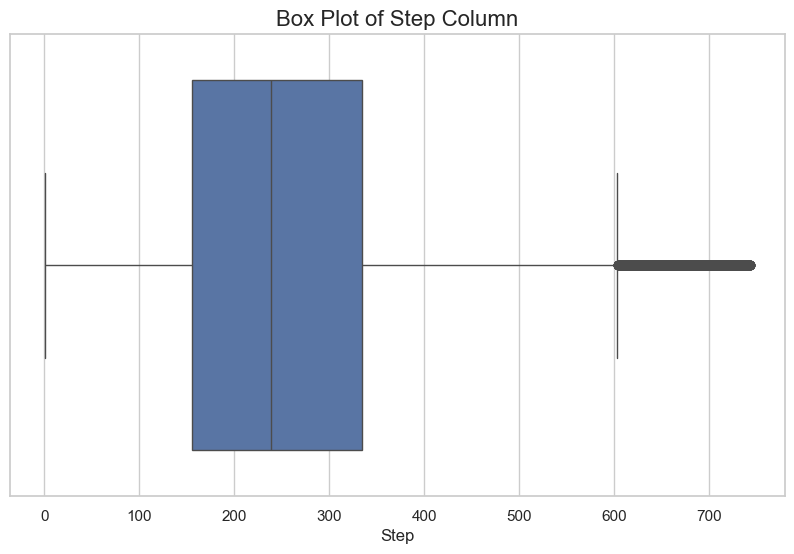

In [5]:
# Box plot for outliers Detction
sns.set(style="whitegrid")

# Create a box plot for the 'step' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['step'])

# Add titles and labels
plt.title('Box Plot of Step Column', fontsize=16)
plt.xlabel('Step', fontsize=12)

# Show the plot
plt.show()

In [7]:
len(df[df['step']>600])

103573

###### **Conclusion**
- there is no missing value in step column
- maximum no of transiction was done on step no 19 and no of transiction was 51352
- minimum no of transiction was done on step no 662 and no of transiction was 2
- maximum transiction has been done between 150-350 steps
- there is no outliers 
- dtype of step column is int64 which can be reduced to int16

##### **type Column**

In [148]:
# finding missing values
df['type'].isnull().sum()

0

In [149]:
# finding the frequency count of each type of transiction
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: ylabel='count'>

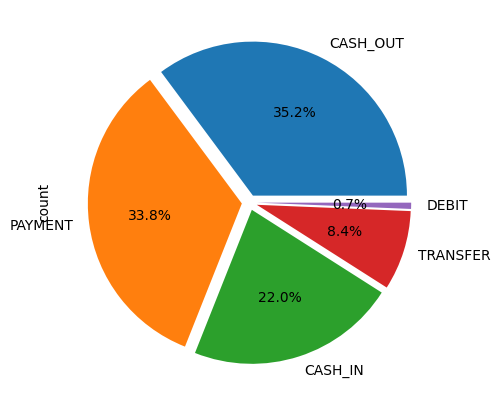

In [150]:
# plotting graph for better vislisation
df['type'].value_counts().plot(kind='pie', explode=[0.05]*df['type'].nunique(), autopct='%1.1f%%', figsize=(5, 5))


###### **Conclusion**

- there is no missing values
- maximum transiction 35% was done through CASH_OUT 
- minimum transiction 0.7% was done through DEBIT
- there are five modes of transiction

##### **amount**

In [151]:
df['amount'].isnull().sum()

0

In [152]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [153]:
# maximum amount of transiction
df['amount'].max()

92445516.64

In [154]:
# minimum amount of transiction
df['amount'].min()

0.0

In [155]:
# transicton where amount was 0
(df['amount']==0).sum()

16

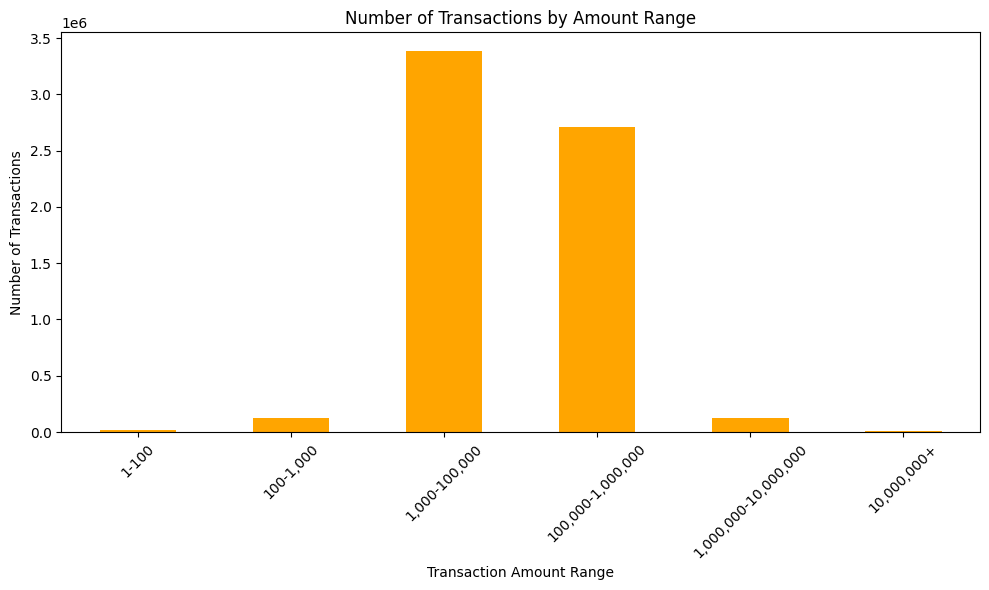

In [156]:
# Graph to visualise the no of transiction done in particular range
# Define the bins and labels for the ranges
bins = [1, 100, 1000, 100000, 1000000, 10000000, 100000000]  # Upper bound to match max value
labels = ['1-100', '100-1,000', '1,000-100,000', '100,000-1,000,000', '1,000,000-10,000,000', '10,000,000+']

# Categorize the 'amount' column into bins
df['amount_bin'] = pd.cut(df['amount'], bins=bins, labels=labels, right=False)

# Count the number of transactions in each bin
amount_bin_counts = df['amount_bin'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
amount_bin_counts.plot(kind='bar', color='orange')
plt.title('Number of Transactions by Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


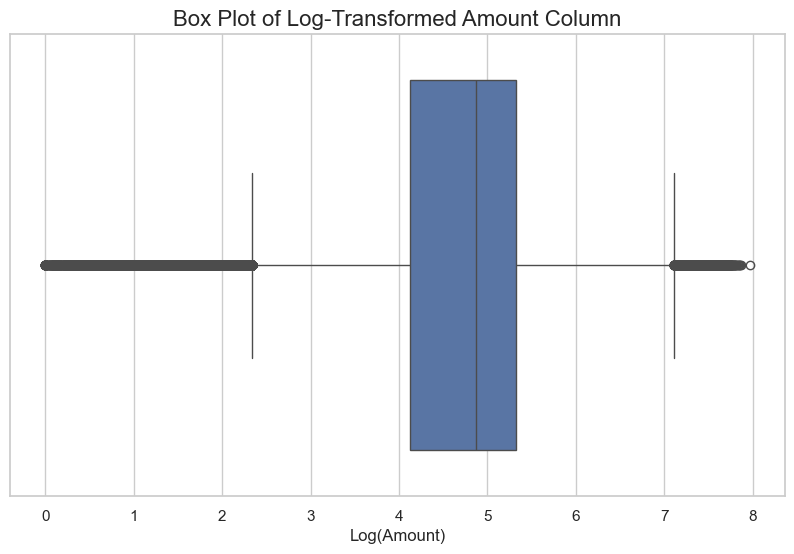

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Apply log transformation to the 'amount' column
df['log_amount'] = np.log10(df['amount'] + 1)  # Adding 1 to avoid log(0) error

# Create the box plot for the transformed 'amount' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_amount'])

# Add titles and labels
plt.title('Box Plot of Log-Transformed Amount Column', fontsize=16)
plt.xlabel('Log(Amount)', fontsize=12)

# Show the plot
plt.show()


In [13]:
# finding amount greater than 1 Crore
len(df[df['amount']>10000000])

2443

###### **Conclusion**
- there is no missing value
- maximum transiction amount was 92445516.64
- minimum transiction amount was 0 and no of this type of transiction is 16
- maximum no of transiction was done between 1000-100000(thousand to 1 lakh )
- dtype is float64 which can be reduced 

##### **nameOrig**

In [157]:
df['nameOrig'].isnull().sum()

0

In [158]:
len(df['nameOrig'].unique())

6353307

In [159]:
# no of users with more than 1 transiction
# total-unique
print(6362620-6353307)


9313


In [160]:
print((9313/6353307)*100)

0.14658507766112985


In [95]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

###### **Conclusion**
- no missing value in this column
- total 9313 user has done transiction more than one time 
- most of the user has done transiction only once 
- only 0.17% user has done transiction more than once

##### **oldbalanceOrg**

In [96]:
# finding null values
df['oldbalanceOrg'].isnull().sum()

0

In [97]:
df['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [98]:
df['oldbalanceOrg'].max()

59585040.37

In [99]:
df['oldbalanceOrg'].min()

0.0

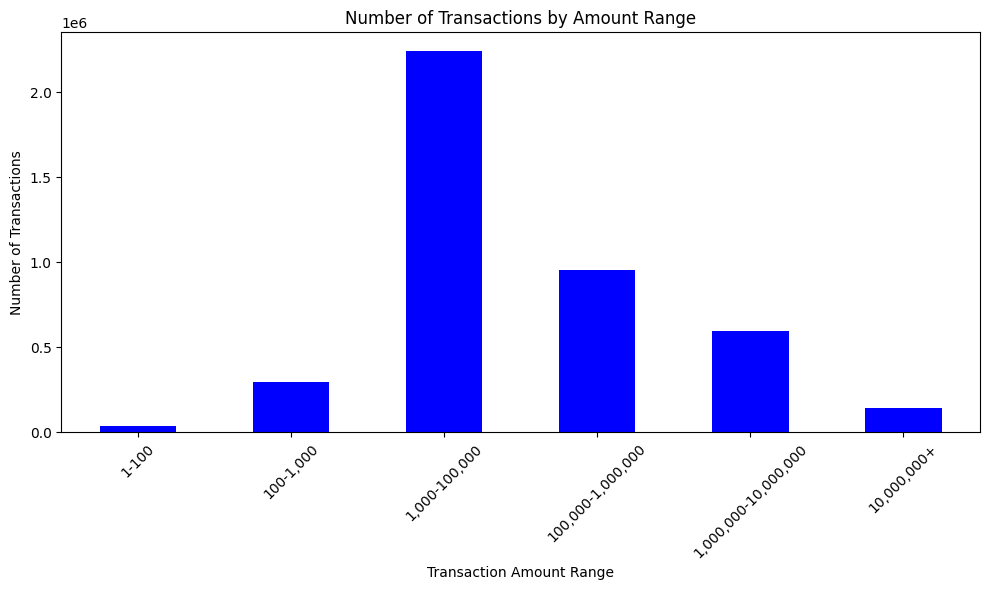

In [100]:
# Graph to visualise the no of transiction done in particular range
# Define the bins and labels for the ranges
bins = [1, 100, 1000, 100000, 1000000, 10000000, 100000000]  # Upper bound to match max value
labels = ['1-100', '100-1,000', '1,000-100,000', '100,000-1,000,000', '1,000,000-10,000,000', '10,000,000+']

# Categorize the 'amount' column into bins
df['amount_bin'] = pd.cut(df['oldbalanceOrg'], bins=bins, labels=labels, right=False)

# Count the number of transactions in each bin
amount_bin_counts = df['amount_bin'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
amount_bin_counts.plot(kind='bar', color='blue')
plt.title('Number of Transactions by Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


In [101]:
(df['oldbalanceOrg']>10000000).sum()

140828

###### **Conclusion**
- no missing value
- maximum no of user has initial amount between 1000-100000
- there are 140828 user  having amount more than 1 crore
- maixmum amount in account was 59585040.37 and minimum was 0

##### **newbalanceOrg**

In [102]:
df['newbalanceOrig'].isnull().sum()

0

In [103]:
df['newbalanceOrig'].max()

49585040.37

In [104]:
df['newbalanceOrig'].min()

0.0

In [105]:
df['newbalanceOrig'].describe()

count    6.362620e+06
mean     8.551137e+05
std      2.924049e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

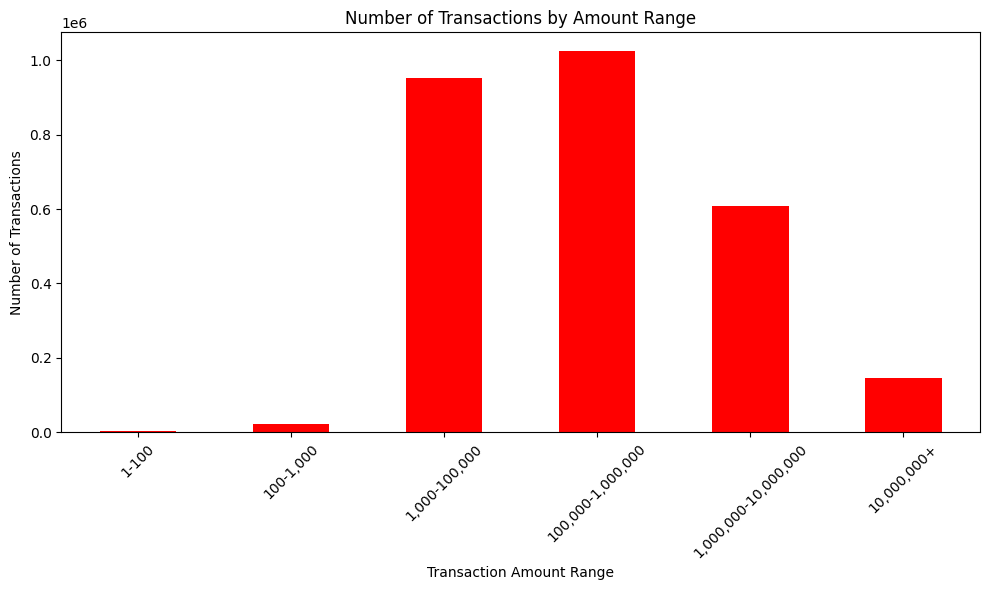

In [106]:
# Graph to visualise the no of transiction done in particular range
# Define the bins and labels for the ranges
bins = [1, 100, 1000, 100000, 1000000, 10000000, 100000000]  # Upper bound to match max value
labels = ['1-100', '100-1,000', '1,000-100,000', '100,000-1,000,000', '1,000,000-10,000,000', '10,000,000+']

# Categorize the 'amount' column into bins
df['amount_bin'] = pd.cut(df['newbalanceOrig'], bins=bins, labels=labels, right=False)

# Count the number of transactions in each bin
amount_bin_counts = df['amount_bin'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
amount_bin_counts.plot(kind='bar', color='red')
plt.title('Number of Transactions by Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


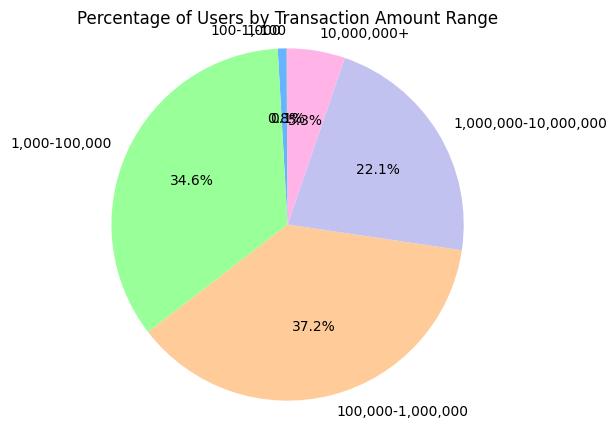

In [107]:
# Graph to visulaise the % of user having money between these ranges 
mount_bin_counts = df['amount_bin'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(amount_bin_counts, labels=amount_bin_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'], startangle=90)

# Add a title and ensure equal aspect ratio for a perfect circle
plt.title('Percentage of Users by Transaction Amount Range')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [108]:
(df['newbalanceOrig']>10000000).sum()

145092

In [109]:
print()

###### **Conclusion**
- no missing value
- after transiction maximum user have more than 10 lakh in thier account
- 37 % of people have money between 10 lakh and 1 crore
- 34.6% of people have money between 10 thousand and 1 lakh
- 145092 people have money more than 1 crore

##### **nameDest**

In [110]:
df['nameDest'].isnull().sum()

0

In [111]:
df['nameDest'].nunique()

2722362

In [112]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [113]:
(df['nameDest'].value_counts()>50).sum()

1033

In [114]:
(df['nameDest'].value_counts()>100).sum()

6

###### **Conclusion**
- there is no missing value
- there are 6 user in which more than 100 transiction have been done
- there are 1033 user in which more than 50 transiction have been done
- out of 6362620 only 2722362 user are unique

##### **oldbalanceDest**


In [115]:
df['oldbalanceDest'].isnull().sum()

0

In [116]:
df['oldbalanceDest'].describe()

count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

In [117]:
df['oldbalanceDest'].max()

356015889.35

In [118]:
df['oldbalanceDest'].min()

0.0

In [119]:
(df['oldbalanceOrg']>10000000).sum()

140828

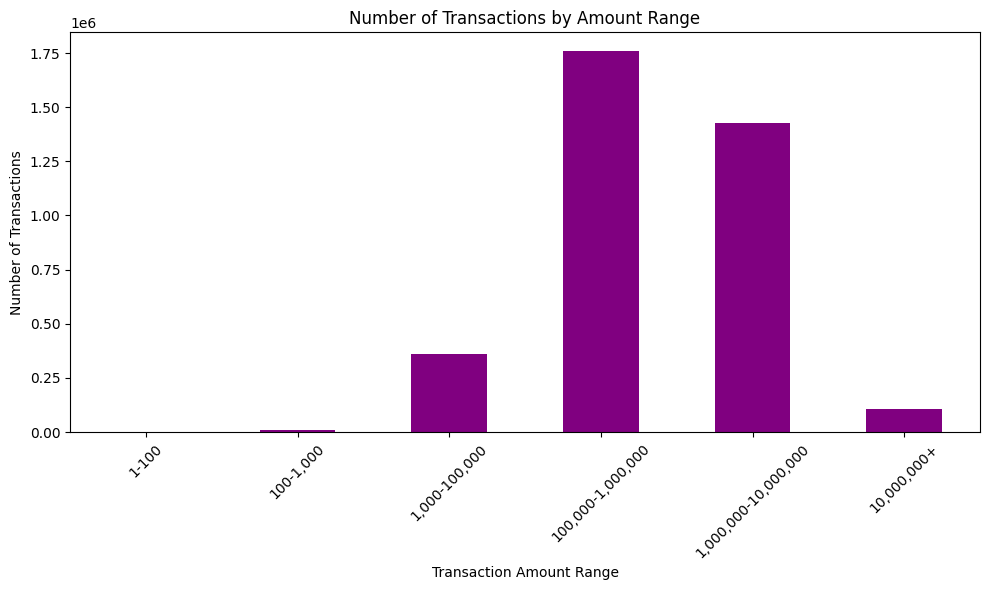

In [120]:
# Graph to visualise the no of transiction done in particular range
# Define the bins and labels for the ranges
bins = [1, 100, 1000, 100000, 1000000, 10000000, 100000000]  # Upper bound to match max value
labels = ['1-100', '100-1,000', '1,000-100,000', '100,000-1,000,000', '1,000,000-10,000,000', '10,000,000+']

# Categorize the 'amount' column into bins
df['amount_bin'] = pd.cut(df['oldbalanceDest'], bins=bins, labels=labels, right=False)

# Count the number of transactions in each bin
amount_bin_counts = df['amount_bin'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
amount_bin_counts.plot(kind='bar', color='purple')
plt.title('Number of Transactions by Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


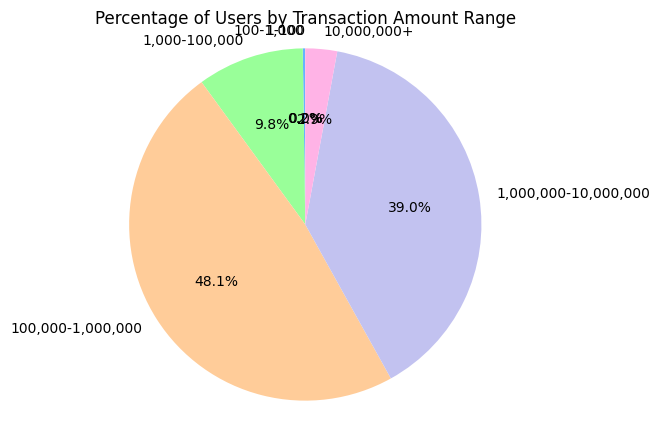

In [121]:
# finding the % of amount in dest account
mount_bin_counts = df['amount_bin'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(amount_bin_counts, labels=amount_bin_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'], startangle=90)

# Add a title and ensure equal aspect ratio for a perfect circle
plt.title('Percentage of Users by Transaction Amount Range')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###### **Conclusion**
- 48% of user having money between 1 lakh to 10 lakh 
- 39% of user having money between 10 lakh to 1 crore
- 140828 user having money more than 1 crore
- there is no missing value

##### **newbalanceDest**


In [122]:
df['newbalanceDest'].isnull().sum()

0

In [123]:
df['newbalanceDest'].max()

356179278.92

In [124]:
df['newbalanceDest'].min()

0.0

In [125]:
(df['newbalanceDest']>10000000).sum()

118935

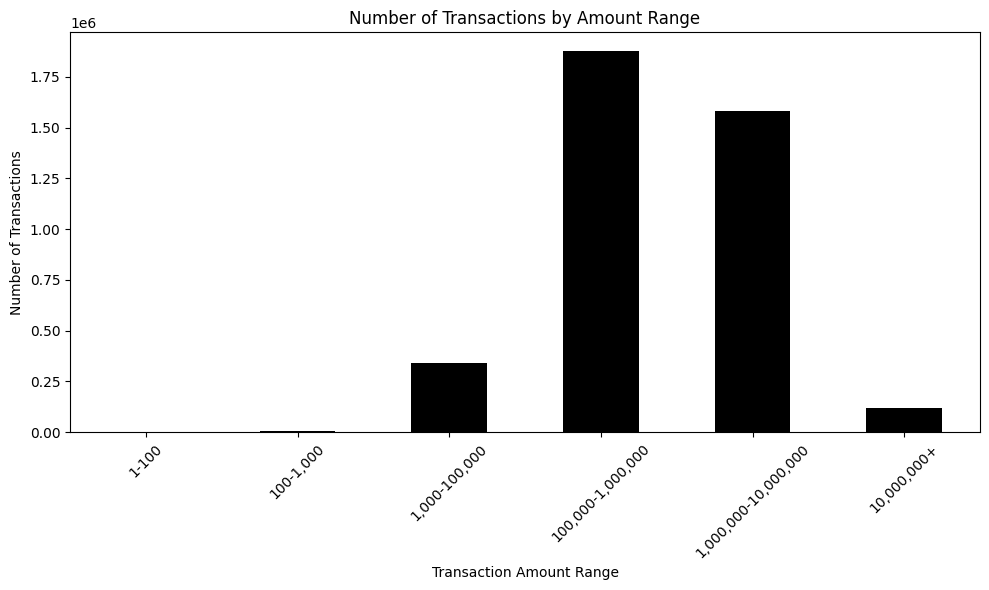

In [126]:
# Graph to visualise the no of transiction done in particular range
# Define the bins and labels for the ranges
bins = [1, 100, 1000, 100000, 1000000, 10000000, 100000000]  # Upper bound to match max value
labels = ['1-100', '100-1,000', '1,000-100,000', '100,000-1,000,000', '1,000,000-10,000,000', '10,000,000+']

# Categorize the 'amount' column into bins
df['amount_bin'] = pd.cut(df['newbalanceDest'], bins=bins, labels=labels, right=False)

# Count the number of transactions in each bin
amount_bin_counts = df['amount_bin'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
amount_bin_counts.plot(kind='bar', color='black')
plt.title('Number of Transactions by Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


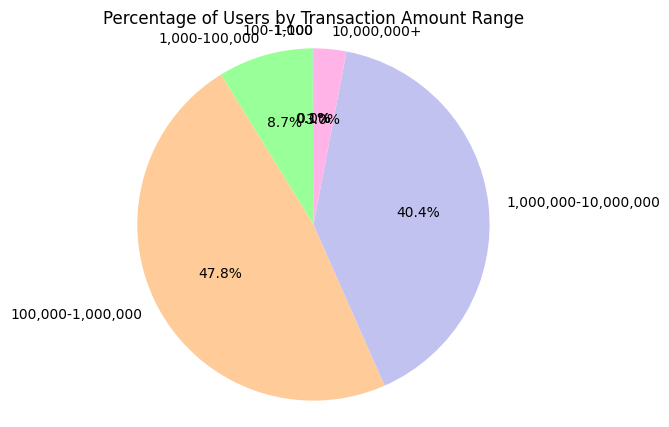

In [127]:
mount_bin_counts = df['amount_bin'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(amount_bin_counts, labels=amount_bin_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'], startangle=90)

# Add a title and ensure equal aspect ratio for a perfect circle
plt.title('Percentage of Users by Transaction Amount Range')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###### **Conclusion**
- almost 48% of user have money between 1 lakh and 10 lakh
- 40% of user have money between 10 lakh  and 1 crore
- 118935 user have more than 1 crore 

##### **isFraud**


In [128]:
df['isFraud'].isnull().sum()

0

In [129]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [130]:
print((8213/6354407)*100)

0.129248881917699


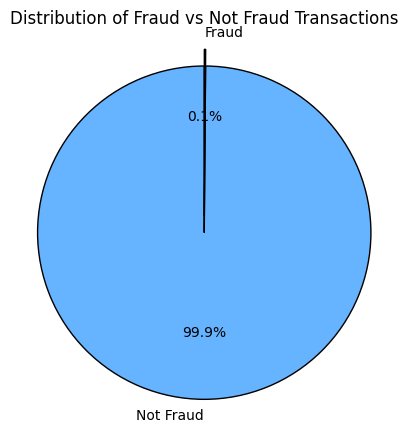

In [131]:
fraud_counts = df['isFraud'].value_counts()

# Define the labels for the pie chart
labels = ['Not Fraud', 'Fraud']

# Calculate the explode values - explode the smaller portion
explode = [0, 0.1] if fraud_counts[1] < fraud_counts[0] else [0.1, 0]  # Explode the smaller percentage

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90, colors=['#66b3ff', '#ff6666'], wedgeprops={'edgecolor': 'black'})

# Add a title and ensure the pie chart is circular
plt.title('Distribution of Fraud vs Not Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

###### **Conclusion**
- highly Imbalanced 
- only 0.12% of data is 1 and else is 0
- there is no missing value

##### **isFlaggedFraud**


In [132]:
df['isFlaggedFraud'].isnull().sum()

0

In [133]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

#### **Bivariate Analysis**

##### **step vs type**

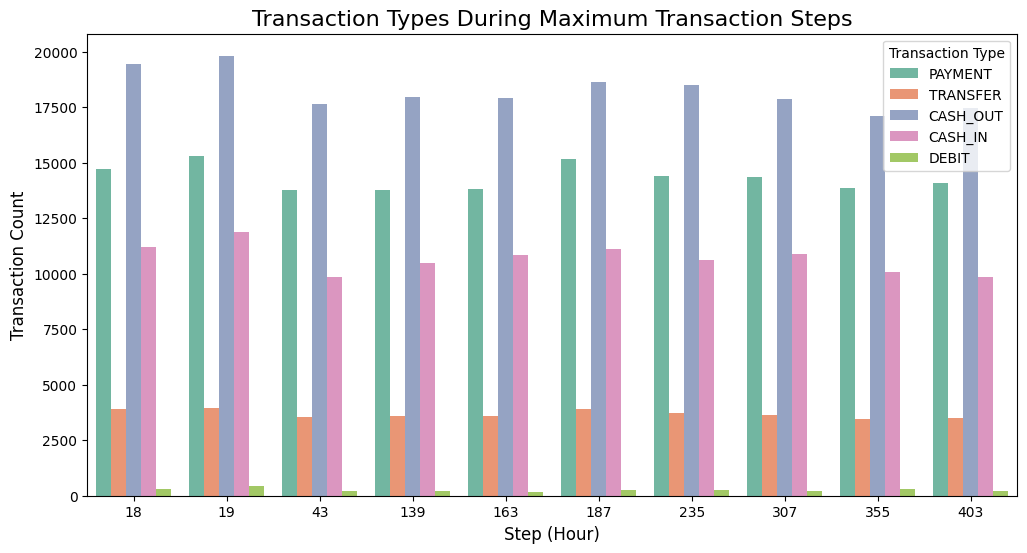

In [135]:
# graph to find the transiction type during the Maximum Transiction type
# Define the steps with maximum transactions
max_steps = [19, 18, 187, 235, 307, 163, 139, 403, 43, 355]

# Filter the data for these steps
df_max_steps = df[df['step'].isin(max_steps)]


# Define the steps with minimum transactions
min_steps = [662, 112, 706, 693, 29, 593, 245, 246, 627, 293]

# Filter the data for these steps
df_min_steps = df[df['step'].isin(min_steps)]


plt.figure(figsize=(12,6))
sns.countplot(data=df_max_steps, x='step', hue='type', palette='Set2')

# Set titles and labels
plt.title('Transaction Types During Maximum Transaction Steps', fontsize=16)
plt.xlabel('Step (Hour)', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.legend(title='Transaction Type')
plt.show()

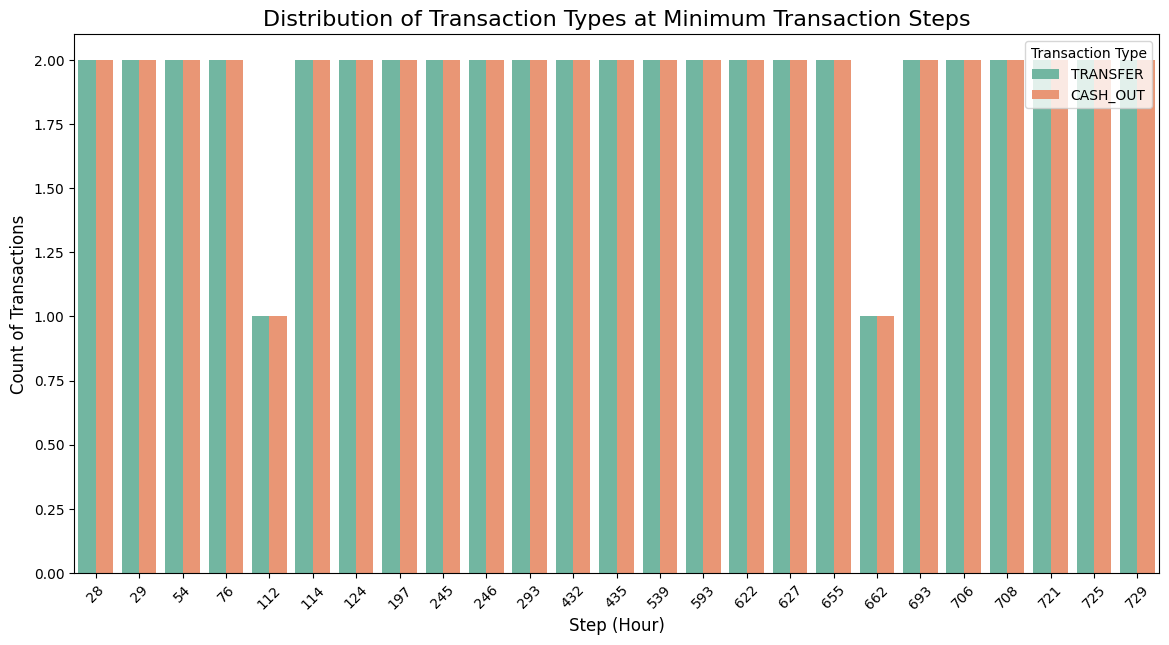

In [136]:
# graph to find the transiction type during the Minimum Transiction type
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Given data for minimum transaction steps and their counts
min_steps = {
    662: 2, 112: 2, 706: 4, 693: 4, 29: 4, 593: 4, 245: 4, 246: 4, 627: 4, 293: 4,
    539: 4, 729: 4, 76: 4, 622: 4, 725: 4, 197: 4, 432: 4, 708: 4, 54: 4, 655: 4,
    435: 4, 124: 4, 721: 4, 28: 4, 114: 4
}

# Convert the dictionary into a DataFrame
df_min_steps = pd.DataFrame(list(min_steps.items()), columns=['step', 'count'])

# Filter the main DataFrame for these steps
df_filtered = df[df['step'].isin(df_min_steps['step'])]

# Plot the transaction types for the filtered steps
plt.figure(figsize=(14, 7))
sns.countplot(data=df_filtered, x='step', hue='type', palette='Set2')

# Set titles and labels
plt.title('Distribution of Transaction Types at Minimum Transaction Steps', fontsize=16)
plt.xlabel('Step (Hour)', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.legend(title='Transaction Type')
plt.xticks(rotation=45)
plt.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_27307/1205036462.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  step_type_binned_counts = df.groupby(['step_binned', 'type']).size().unstack(fill_value=0)


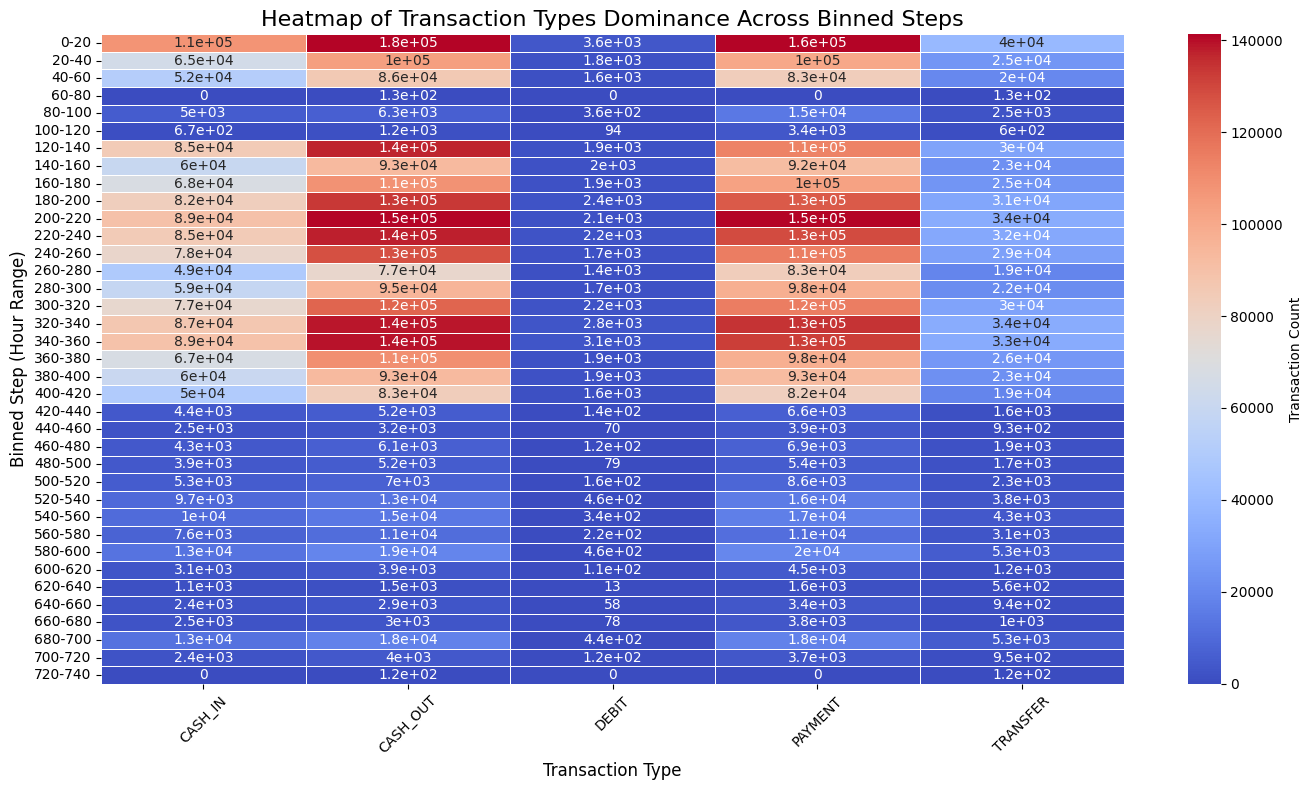

In [70]:
# Heatmap to visualise the overall transiction type during each range of steps like 0-10,10-20

# Step 1: Create bins for the 'step' column (size 20)
bins = np.arange(0, 740 + 20, 20)  # Bins of size 20 from 0 to 740
labels = [f'{i}-{i+20}' for i in bins[:-1]]  # Labels like '0-20', '20-40', etc.

# Step 2: Add a new column for binned steps
df['step_binned'] = pd.cut(df['step'], bins=bins, labels=labels, right=False)

# Step 3: Group by 'step_binned' and 'type' and count the transactions
step_type_binned_counts = df.groupby(['step_binned', 'type']).size().unstack(fill_value=0)

# Step 4: Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(step_type_binned_counts, cmap='coolwarm', linewidths=0.5, annot=True, cbar_kws={'label': 'Transaction Count'}, robust=True)

# Set titles and labels
plt.title('Heatmap of Transaction Types Dominance Across Binned Steps', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Binned Step (Hour Range)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



###### **Conclusion**
- Although CASH_OUT is still in dominance on the steps where the transictions were very high
- CASH_OUT  is in dominance in 0-20,120-140,180-240,320-360 steps
- PAYMENT  is in dominance in 0-20,220-240,340-360
- CASH_IN is in dominance in first 0-20 hours
- maximum transiction has been done in first 420 steps




##### **step vs amount**

In [163]:
# Graph to visalise the maximum toatal amount transiction  on a particular step

# Step 1: Get the counts of transactions at each step
step_counts = df['step'].value_counts().sort_index()

# Step 2: Group by 'step' and sum the transaction 'amount' at each step
step_amounts = df.groupby('step')['amount'].sum().reset_index()

# Step 3: Create a DataFrame combining step counts and amounts
step_counts_df = pd.DataFrame({
    'step': step_counts.index,
    'count': step_counts.values,
    'amount': step_amounts['amount']
})

# Step 4: Create a scatter plot with larger circles for higher amounts
fig = px.scatter(step_counts_df, x='step', y='count',
                 title='Transaction Distribution Across Steps with Transaction Amounts',
                 labels={'step': 'Step (Hour)', 'count': 'Number of Transactions'},
                 size='amount',  # Marker size based on transaction amount
                 color='amount',  # Color based on transaction amount
                 template='plotly_dark',
                 hover_data={'amount': True, 'count': True})  # Show amount on hover

# Step 5: Customize marker sizes and colors for better visibility
fig.update_traces(marker=dict(sizemode='diameter', sizeref=2.*max(step_counts_df['amount'])/(40.**2),
                              line=dict(width=2, color='DarkSlateGrey')))

# Step 6: Update layout for attractiveness
fig.update_layout(title_font_size=22, title_x=0.5,  # Center title
                  xaxis_title='Steps (Hours)', yaxis_title='Number of Transactions',
                  font=dict(family="Arial", size=14, color="white"))

# Show the plot
fig.show()


In [166]:
# graph to visualise the totol amount transiction on the highest transiction day

# Define the steps (hours) with maximum transactions
max_steps = [19, 18, 187, 235, 307, 163, 139, 403, 43, 355]

# Step 1: Filter data for only the maximum transaction steps
df_max_steps = df[df['step'].isin(max_steps)]

# Step 2: Group by 'step' and calculate the total transaction 'amount' for each step
step_amounts = df_max_steps.groupby('step')['amount'].sum().reset_index()

# Step 3: Count the number of transactions for each step
step_counts = df_max_steps['step'].value_counts().sort_index()
step_counts_df = pd.DataFrame({'step': step_counts.index, 'count': step_counts.values})

# Step 4: Combine the counts and amounts into a DataFrame
step_counts_df['total_amount'] = step_amounts['amount'].values

# Step 5: Create a scatter plot with steps on the x-axis and total amount on the y-axis
fig = px.scatter(step_counts_df, x='step', y='total_amount',
                 title='Total Transaction Amounts on Steps with Maximum Transactions',
                 labels={'step': 'Step (Hour)', 'total_amount': 'Total Transaction Amount'},
                 size='total_amount',  # Size based on total amount
                 color='total_amount',  # Color based on total amount
                 template='plotly_dark')

# Step 6: Adjust size scaling for visibility
fig.update_traces(marker=dict(sizemode='area',  # Use area for sizing
                              sizeref=2.*max(step_counts_df['total_amount'])/(50.**2),  # Adjust size scale
                              sizemin=10))  # Minimum size for better visibility

# Step 7: Update layout for better readability
fig.update_layout(title_font_size=20, title_x=0.5,  # Center title
                  xaxis_title='Steps (Hours)', yaxis_title='Total Transaction Amount',
                  font=dict(family="Arial", size=14, color="white"))

# Show the plot
fig.show()


In [167]:


# Define the steps (hours) with minimum transactions
min_steps = [662, 112, 706, 693, 29, 593, 245, 246, 627, 293,
             539, 729, 76, 622, 725, 197, 432, 708, 54, 655,
             435, 124, 721, 28, 114]

# Step 1: Filter data for only the minimum transaction steps
df_min_steps = df[df['step'].isin(min_steps)]

# Step 2: Group by 'step' and calculate the total transaction 'amount' for each step
step_amounts_min = df_min_steps.groupby('step')['amount'].sum().reset_index()

# Step 3: Count the number of transactions for each step
step_counts_min = df_min_steps['step'].value_counts().sort_index()
step_counts_df_min = pd.DataFrame({'step': step_counts_min.index, 'count': step_counts_min.values})

# Step 4: Combine the counts and amounts into a DataFrame
step_counts_df_min['total_amount'] = step_amounts_min['amount'].values

# Step 5: Create a scatter plot with steps on the x-axis and total amount on the y-axis
fig_min = px.scatter(step_counts_df_min, x='step', y='total_amount',
                    title='Total Transaction Amounts on Steps with Minimum Transactions',
                    labels={'step': 'Step (Hour)', 'total_amount': 'Total Transaction Amount'},
                    size='total_amount',  # Size based on total amount
                    color='total_amount',  # Color based on total amount
                    template='plotly_dark')

# Step 6: Adjust size scaling for visibility
fig_min.update_traces(marker=dict(sizemode='area',  # Use area for sizing
                                  sizeref=2.*max(step_counts_df_min['total_amount'])/(50.**2),  # Adjust size scale
                                  sizemin=10))  # Minimum size for better visibility

# Step 7: Update layout for better readability
fig_min.update_layout(title_font_size=20, title_x=0.5,  # Center title
                      xaxis_title='Steps (Hours)', yaxis_title='Total Transaction Amount',
                      font=dict(family="Arial", size=14, color="white"))

# Show the plot
fig_min.show()


In [169]:
# graph to find Individual maximum transiction done particular step
# Define the steps with zero transaction amounts
zero_amount_steps = [662, 112, 706, 693, 29, 593, 245, 246, 627, 293,
                     539, 729, 76, 622, 725, 197]

# Step 1: Filter data for all transactions
df_all_steps = df[['step', 'amount']]

# Step 2: Get the top 10 steps based on the maximum individual transaction amount
top_10_transactions = df_all_steps.loc[df_all_steps.groupby('step')['amount'].idxmax()]
top_10_transactions = top_10_transactions.nlargest(10, 'amount')

# Step 3: Prepare data for zero transaction amounts (assuming zero means no transactions at all)
# Here we'll use zero_amount_steps list to simulate steps with zero transaction amount
zero_amount_df = pd.DataFrame({'step': zero_amount_steps, 'amount': [0]*len(zero_amount_steps)})

# Step 4: Combine the top 10 and zero amount steps into a single DataFrame
combined_df = pd.concat([top_10_transactions, zero_amount_df])

# Step 5: Create a scatter plot with steps on the x-axis and the absolute amount on the y-axis
fig_combined = px.scatter(combined_df, x='step', y='amount',
                         title='Top 10 Highest Single Transaction Amounts and Steps with Zero Amount',
                         labels={'step': 'Step (Hour)', 'amount': 'Single Transaction Amount'},
                         size='amount',  # Size based on single transaction amount
                         color='amount',  # Color based on single transaction amount
                         template='plotly_dark')

# Step 6: Adjust size scaling for visibility
fig_combined.update_traces(marker=dict(sizemode='area',  # Use area for sizing
                                       sizeref=2.*max(combined_df['amount'])/(50.**2),  # Adjust size scale
                                       sizemin=10))  # Minimum size for better visibility

# Step 7: Update layout for better readability
fig_combined.update_layout(title_font_size=20, title_x=0.5,  # Center title
                           xaxis_title='Steps (Hours)', yaxis_title='Single Transaction Amount',
                           font=dict(family="Arial", size=14, color="white"))

# Show the plot
fig_combined.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_27307/3303255631.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_27307/3303255631.py:20: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



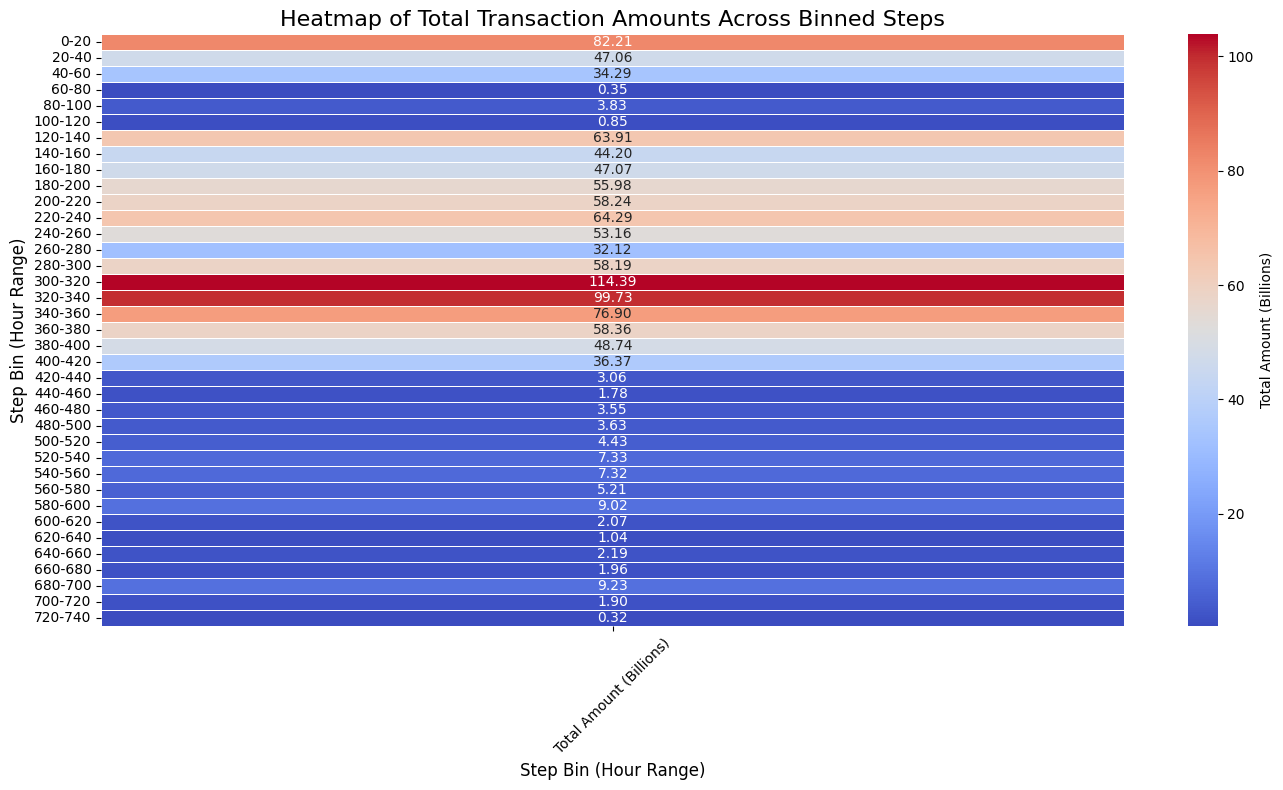

In [174]:
# heatmap to visualise the maximum total amount transiction on particular day

# Create bins for the 'step' column (size 20)
bins = np.arange(0, 740 + 20, 20)  # Bins of size 20 from 0 to 740
labels = [f'{i}-{i+20}' for i in bins[:-1]]  # Labels like '0-20', '20-40', etc.

# Add a new column for binned steps
df['step_binned'] = pd.cut(df['step'], bins=bins, labels=labels, right=False)

# Group by 'step_binned' and sum the transaction amounts
step_binned_amounts = df.groupby('step_binned')['amount'].sum().reset_index()

# Convert amounts to billions for better readability
step_binned_amounts['amount'] = step_binned_amounts['amount'] / 1e9

# Create a DataFrame suitable for heatmap plotting
heatmap_data = pd.DataFrame({
    'Step Bin': step_binned_amounts['step_binned'],
    'Total Amount (Billions)': step_binned_amounts['amount']
}).pivot_table(index='Step Bin', values='Total Amount (Billions)')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5, annot=True, fmt='.2f', cbar_kws={'label': 'Total Amount (Billions)'}, robust=True)

# Set titles and labels
plt.title('Heatmap of Total Transaction Amounts Across Binned Steps', fontsize=16)
plt.xlabel('Step Bin (Hour Range)', fontsize=12)
plt.ylabel('Step Bin (Hour Range)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


###### **Conclusion**
- although maximum no of transsiction was done on step 19 but still the highest total amount of transiction was done on step 12,21,53
- maximum total amount was done between step hours of 0-20,300-360

##### **step vs isFraud**


In [182]:
import pandas as pd
import plotly.express as px

# Step 1: Identify steps with the highest number of transactions
step_counts = df['step'].value_counts().sort_index()
top_steps = step_counts.nlargest(10).index  # Top 10 steps with the highest number of transactions

# Step 2: Filter the dataset for these top steps
top_steps_df = df[df['step'].isin(top_steps)]

# Calculate the total number of fraudulent transactions for these top steps
fraudulent_counts = top_steps_df[top_steps_df['isFraud'] == 1].groupby('step').size().reset_index(name='Fraudulent Transactions')

# Fill in missing steps with 0 fraudulent transactions
for step in top_steps:
    if step not in fraudulent_counts['step'].values:
        fraudulent_counts = fraudulent_counts.append({'step': step, 'Fraudulent Transactions': 0}, ignore_index=True)

# Sort by step for better readability
fraudulent_counts = fraudulent_counts.sort_values(by='step')

# Step 3: Plot the data using Plotly
fig = px.scatter(fraudulent_counts, x='step', y='Fraudulent Transactions',
                 title='Fraudulent Transactions in Top Steps with Maximum Transactions',
                 labels={'step': 'Step', 'Fraudulent Transactions': 'Number of Fraudulent Transactions'},
                 size='Fraudulent Transactions', color='Fraudulent Transactions',
                 template='plotly_dark')

# Show the plot
fig.show()


In [183]:
import pandas as pd
import plotly.express as px

# Step 1: Identify steps with the lowest number of transactions
step_counts = df['step'].value_counts().sort_index()
bottom_steps = step_counts.nsmallest(10).index  # Bottom 10 steps with the lowest number of transactions

# Step 2: Filter the dataset for these bottom steps
bottom_steps_df = df[df['step'].isin(bottom_steps)]

# Calculate the total number of fraudulent transactions for these bottom steps
fraudulent_counts_bottom = bottom_steps_df[bottom_steps_df['isFraud'] == 1].groupby('step').size().reset_index(name='Fraudulent Transactions')

# Fill in missing steps with 0 fraudulent transactions
for step in bottom_steps:
    if step not in fraudulent_counts_bottom['step'].values:
        fraudulent_counts_bottom = fraudulent_counts_bottom.append({'step': step, 'Fraudulent Transactions': 0}, ignore_index=True)

# Sort by step for better readability
fraudulent_counts_bottom = fraudulent_counts_bottom.sort_values(by='step')

# Step 3: Plot the data using Plotly
fig_bottom = px.scatter(fraudulent_counts_bottom, x='step', y='Fraudulent Transactions',
                       title='Fraudulent Transactions in Bottom Steps with Minimum Transactions',
                       labels={'step': 'Step', 'Fraudulent Transactions': 'Number of Fraudulent Transactions'},
                       size='Fraudulent Transactions', color='Fraudulent Transactions',
                       template='plotly_dark')

# Show the plot
fig_bottom.show()


###### **Conclusion** 
- it was step no 18,307,403 in which maximum transiction was done 
- maximum Fraud transiction was done between 20-80,260-280,360-420

##### **step vs isFlaggedFraud**

/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/2930114173.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = fraud_df.groupby('step_binned').size().reset_index(name='Flagged Fraudulent Transactions')


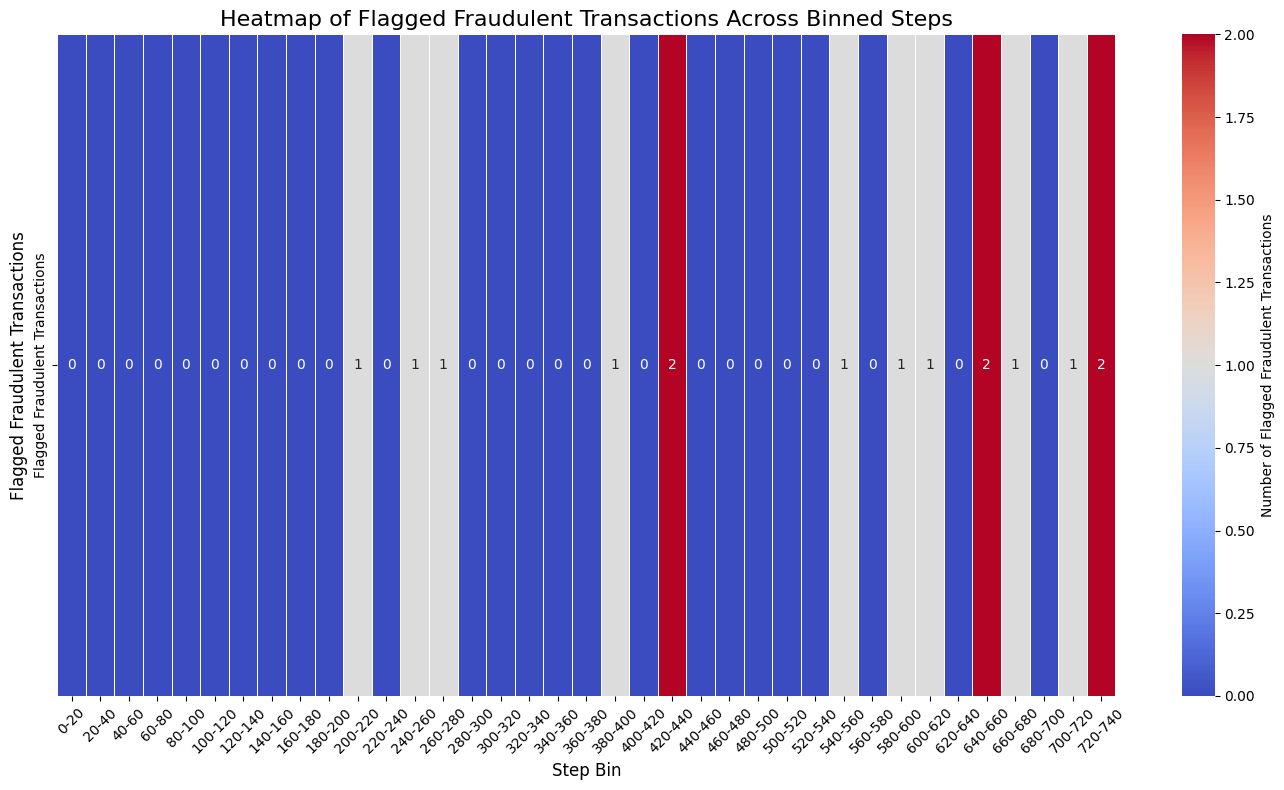

In [7]:


# Create bins for the 'step' column
bins = np.arange(0, 740 + 20, 20)  # Bins of size 20 from 0 to 740
labels = [f'{i}-{i+20}' for i in bins[:-1]]  # Labels like '0-20', '20-40', etc.

# Add a new column for binned steps
df['step_binned'] = pd.cut(df['step'], bins=bins, labels=labels, right=False)

# Filter only flagged fraudulent transactions
fraud_df = df[df['isFlaggedFraud'] == 1]

# Group by 'step_binned' and count the flagged fraudulent transactions
fraud_counts = fraud_df.groupby('step_binned').size().reset_index(name='Flagged Fraudulent Transactions')

# Create a DataFrame for the heatmap
heatmap_data = fraud_counts.set_index('step_binned').T  # Transpose to get the correct format for heatmap

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Number of Flagged Fraudulent Transactions'})
plt.title('Heatmap of Flagged Fraudulent Transactions Across Binned Steps', fontsize=16)
plt.xlabel('Step Bin', fontsize=12)
plt.ylabel('Flagged Fraudulent Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:

# Step 1: Identify steps with the highest number of transactions
step_counts = df['step'].value_counts().sort_index()
top_steps = step_counts.nlargest(10).index  # Top 10 steps with the highest number of transactions

# Step 2: Filter the dataset for these top steps
top_steps_df = df[df['step'].isin(top_steps)]

# Calculate the total number of flagged fraudulent transactions for these top steps
flagged_fraudulent_counts = top_steps_df[top_steps_df['isFlaggedFraud'] == 1].groupby('step').size().reset_index(name='Flagged Fraudulent Transactions')

# Fill in missing steps with 0 flagged fraudulent transactions
missing_steps = set(top_steps) - set(flagged_fraudulent_counts['step'])
missing_data = pd.DataFrame({'step': list(missing_steps), 'Flagged Fraudulent Transactions': [0] * len(missing_steps)})

# Concatenate the missing data with the existing fraudulent counts
flagged_fraudulent_counts = pd.concat([flagged_fraudulent_counts, missing_data], ignore_index=True)

# Sort by step for better readability
flagged_fraudulent_counts = flagged_fraudulent_counts.sort_values(by='step')

# Step 3: Plot the data using Plotly
fig = px.scatter(flagged_fraudulent_counts, x='step', y='Flagged Fraudulent Transactions',
                 title='Flagged Fraudulent Transactions in Top Steps with Maximum Transactions',
                 labels={'step': 'Step', 'Flagged Fraudulent Transactions': 'Number of Flagged Fraudulent Transactions'},
                 size='Flagged Fraudulent Transactions', color='Flagged Fraudulent Transactions',
                 template='plotly_dark')

# Show the plot
fig.show()


In [9]:


# Step 1: Identify steps with the lowest number of transactions
step_counts = df['step'].value_counts().sort_index()
bottom_steps = step_counts.nsmallest(10).index  # Bottom 10 steps with the lowest number of transactions

# Step 2: Filter the dataset for these bottom steps
bottom_steps_df = df[df['step'].isin(bottom_steps)]

# Calculate the total number of flagged fraudulent transactions for these bottom steps
flagged_fraudulent_counts_bottom = bottom_steps_df[bottom_steps_df['isFlaggedFraud'] == 1].groupby('step').size().reset_index(name='Flagged Fraudulent Transactions')

# Fill in missing steps with 0 flagged fraudulent transactions
missing_steps = set(bottom_steps) - set(flagged_fraudulent_counts_bottom['step'])
missing_data = pd.DataFrame({'step': list(missing_steps), 'Flagged Fraudulent Transactions': [0] * len(missing_steps)})

# Concatenate the missing data with the existing flagged fraudulent counts
flagged_fraudulent_counts_bottom = pd.concat([flagged_fraudulent_counts_bottom, missing_data], ignore_index=True)

# Sort by step for better readability
flagged_fraudulent_counts_bottom = flagged_fraudulent_counts_bottom.sort_values(by='step')

# Step 3: Plot the data using Plotly
fig_bottom = px.scatter(flagged_fraudulent_counts_bottom, x='step', y='Flagged Fraudulent Transactions',
                       title='Flagged Fraudulent Transactions in Bottom Steps with Minimum Transactions',
                       labels={'step': 'Step', 'Flagged Fraudulent Transactions': 'Number of Flagged Fraudulent Transactions'},
                       size='Flagged Fraudulent Transactions', color='Flagged Fraudulent Transactions',
                       template='plotly_dark')

# Show the plot
fig_bottom.show()


##### **amount vs isFraud**


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/3245172824.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



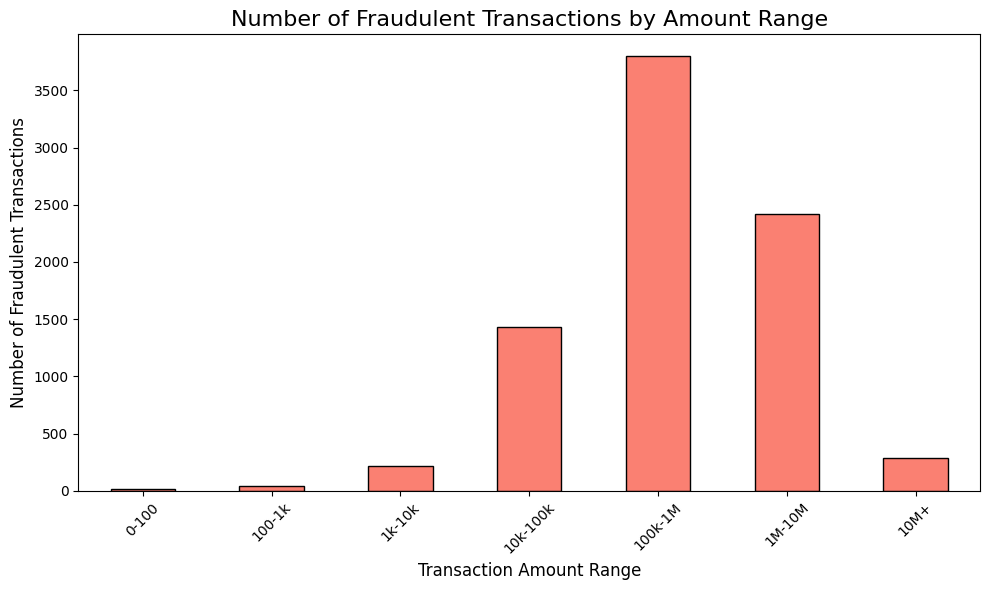

In [10]:


# Define the bins for transaction amount ranges
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # 0-100, 100-1000, ..., above 1 crore
labels = ['0-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Filter only fraudulent transactions (where isFraud == 1)
fraud_df = df[df['isFraud'] == 1]

# Create a new column for the binned transaction amounts
fraud_df['Amount Range'] = pd.cut(fraud_df['amount'], bins=bins, labels=labels, right=False)

# Count the number of fraudulent transactions in each bin
fraud_count_by_range = fraud_df['Amount Range'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
fraud_count_by_range.plot(kind='bar', color='salmon', edgecolor='black')

# Add title and labels
plt.title('Number of Fraudulent Transactions by Amount Range', fontsize=16)
plt.xlabel('Transaction Amount Range', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/2765042922.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



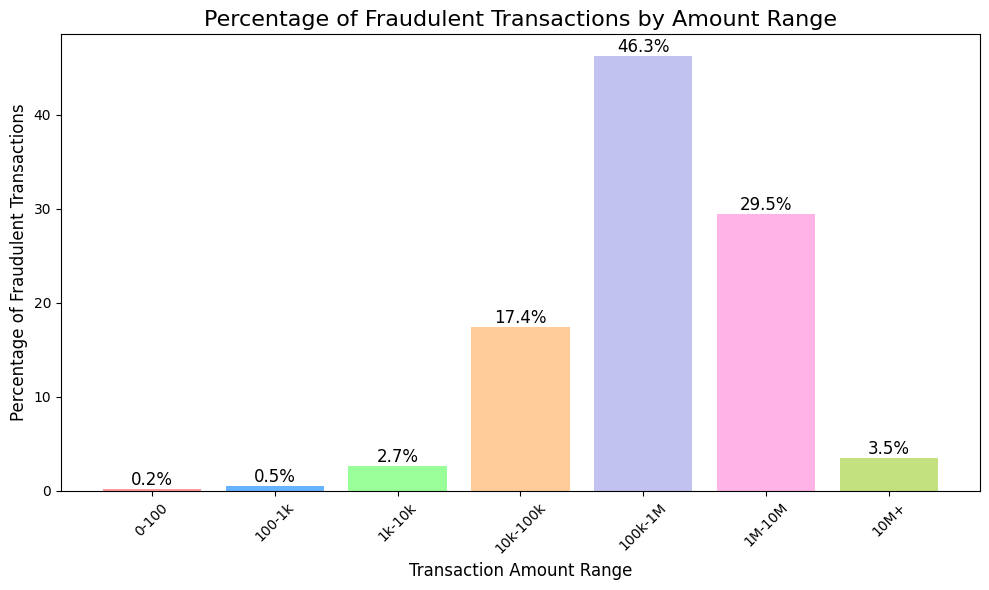

In [14]:


# Define the bins for transaction amount ranges
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # 0-100, 100-1k, ..., above 1 crore
labels = ['0-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Filter only fraudulent transactions (where isFraud == 1)
fraud_df = df[df['isFraud'] == 1]

# Create a new column for the binned transaction amounts
fraud_df['Amount Range'] = pd.cut(fraud_df['amount'], bins=bins, labels=labels, right=False)

# Count the number of fraudulent transactions in each bin
fraud_count_by_range = fraud_df['Amount Range'].value_counts().sort_index()

# Calculate the percentages
fraud_percentage_by_range = (fraud_count_by_range / fraud_count_by_range.sum()) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(fraud_count_by_range.index, fraud_percentage_by_range, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f'])

# Annotate percentages on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Transaction Amount Range', fontsize=12)
plt.ylabel('Percentage of Fraudulent Transactions', fontsize=12)
plt.title('Percentage of Fraudulent Transactions by Amount Range', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/4017275519.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



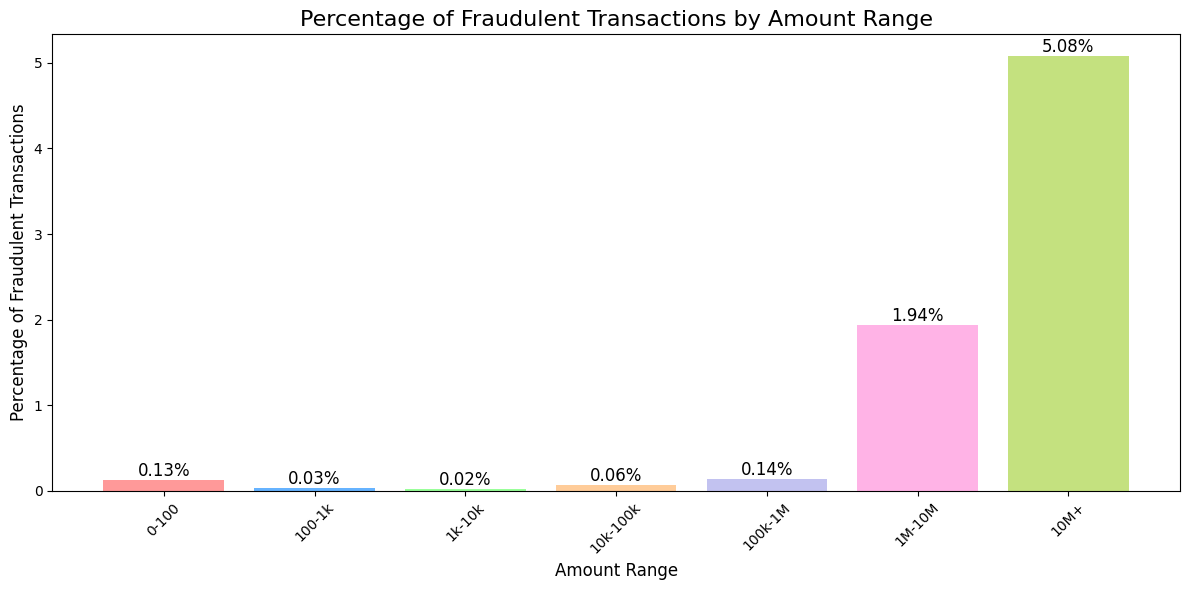

In [24]:


# Define the bins for amount ranges
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # 0-100, 100-1k, ..., above 1 crore
labels = ['0-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Create a new column for the binned amount
df['amount_binned'] = pd.cut(df['amount'], bins=bins, labels=labels, right=False)
fraud_df = df[df['isFraud'] == 1]
fraud_df['amount_binned'] = pd.cut(fraud_df['amount'], bins=bins, labels=labels, right=False)

# Count the total transactions and fraudulent transactions in each bin
total_by_amount = df['amount_binned'].value_counts().sort_index()
fraud_by_amount = fraud_df['amount_binned'].value_counts().sort_index()

# Calculate the percentage of fraudulent transactions for each bin
fraud_percentage = (fraud_by_amount / total_by_amount) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(fraud_percentage.index, fraud_percentage, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f'])

# Annotate percentages on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Amount Range', fontsize=12)
plt.ylabel('Percentage of Fraudulent Transactions', fontsize=12)
plt.title('Percentage of Fraudulent Transactions by Amount Range', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


###### **Conclusion**
- maximum no of fradunent transiction 46% has been done of amount range between 1 lakh to 10 lakh
- but maximum change of fraduent transiction 5.08% is in amount above 1 crore 
- almost 30% of fraduent transicition has been done between range of 10 lakh to 1 crore
- approx 400 fraduent transiction has been done above 1 crore
- and obiously mininum no of fraduent transiction has been done between 1-100
- so we can see as the amount increase the chances of fraduent increase

##### **amount vs isFlaggedFraud**


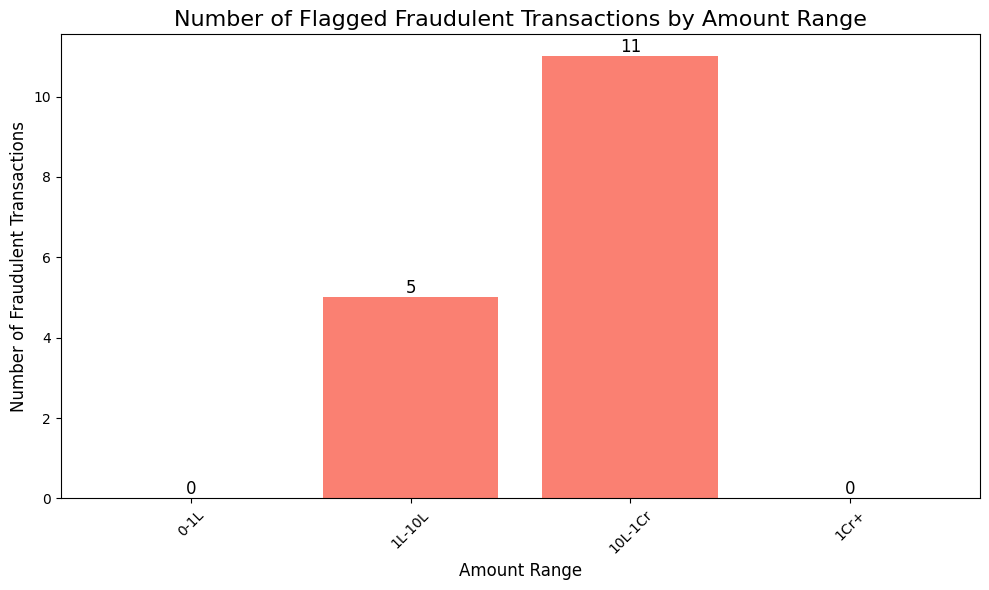

In [46]:


# Sample DataFrame for demonstration (replace with actual DataFrame)
# Assuming 'amount' is the column containing transaction amounts
data = {
    'isFlaggedFraud': [1] * 16,  # Example flag
    'amount': [500000, 600000, 700000, 800000, 900000, 1000000, 1500000, 2000000, 2500000, 3000000,
               3500000, 4000000, 4500000, 5000000, 5500000, 6000000]  # Example amounts
}
df = pd.DataFrame(data)

# Filter for isFlaggedFraud == 1
flagged_fraud_df = df[df['isFlaggedFraud'] == 1]

# Define bins and labels for amounts
bins = [0, 100000, 1000000, 10000000, 100000000]  # 0-1L, 1L-10L, 10L-1Cr, 1Cr+
labels = ['0-1L', '1L-10L', '10L-1Cr', '1Cr+']

# Create a new column for binned amounts
flagged_fraud_df['Amount Range'] = pd.cut(flagged_fraud_df['amount'], bins=bins, labels=labels, right=False)

# Count the number of fraudulent transactions in each bin
amount_range_counts = flagged_fraud_df['Amount Range'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(amount_range_counts.index, amount_range_counts, color='salmon')

# Annotate percentages on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Amount Range', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Number of Flagged Fraudulent Transactions by Amount Range', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


##### **nameOrig vs isFraud**

In [16]:
df[df['isFraud']==1]['nameOrig']

2          C1305486145
3           C840083671
251        C1420196421
252        C2101527076
680         C137533655
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C1280323807
Name: nameOrig, Length: 8213, dtype: object

In [17]:
df[df['isFraud']==1]['nameOrig'].nunique()

8213

###### **Conclusion**
- every fraduent transiction was done through unique account i.e different account
- there is yet no relationship between nameorig and isFraud


##### **oldbalanceOrg vs isFraud**
 

/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/490075884.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/490075884.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



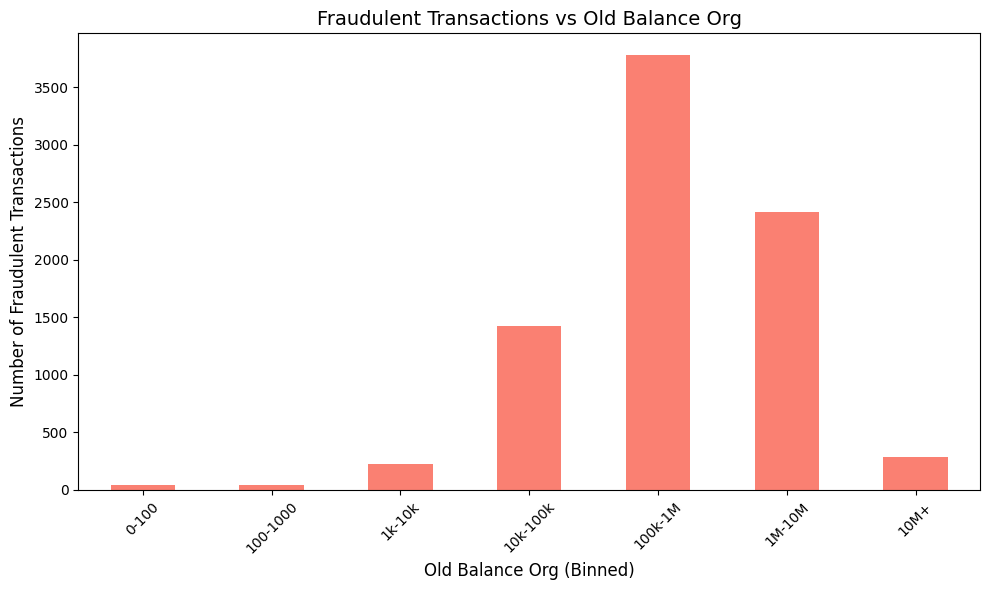

In [18]:

# Define the bin edges for 'oldbalanceOrg'
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # Define your bin edges
labels = ['0-100', '100-1000', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Filter only fraudulent transactions
fraud_df = df[df['isFraud'] == 1]

# Create a new column for the binned ranges of 'oldbalanceOrg'
fraud_df['oldbalanceOrg_binned'] = pd.cut(fraud_df['oldbalanceOrg'], bins=bins, labels=labels, right=False)

# Group by the binned ranges and count the number of fraudulent transactions in each bin
fraud_by_balance = fraud_df.groupby('oldbalanceOrg_binned').size()

# Plot the bar chart
plt.figure(figsize=(10, 6))
fraud_by_balance.plot(kind='bar', color='salmon')

# Add labels and title
plt.xlabel('Old Balance Org (Binned)', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Fraudulent Transactions vs Old Balance Org', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/3598621456.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



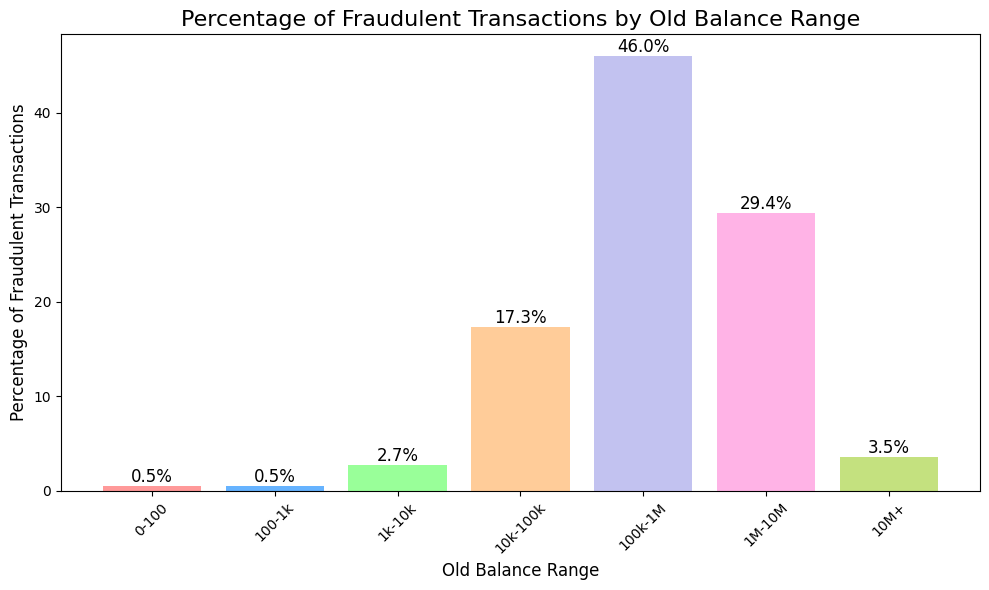

In [20]:


# Define the bins for oldbalanceOrg ranges
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # 0-100, 100-1k, ..., above 1 crore
labels = ['0-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Filter only fraudulent transactions (where isFraud == 1)
fraud_df = df[df['isFraud'] == 1]

# Create a new column for the binned oldbalanceOrg amounts
fraud_df['Old Balance Range'] = pd.cut(fraud_df['oldbalanceOrg'], bins=bins, labels=labels, right=False)

# Count the number of fraudulent transactions in each bin
fraud_count_by_range = fraud_df['Old Balance Range'].value_counts().sort_index()

# Calculate the percentages
fraud_percentage_by_range = (fraud_count_by_range / fraud_count_by_range.sum()) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(fraud_count_by_range.index, fraud_percentage_by_range, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f'])

# Annotate percentages on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Old Balance Range', fontsize=12)
plt.ylabel('Percentage of Fraudulent Transactions', fontsize=12)
plt.title('Percentage of Fraudulent Transactions by Old Balance Range', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


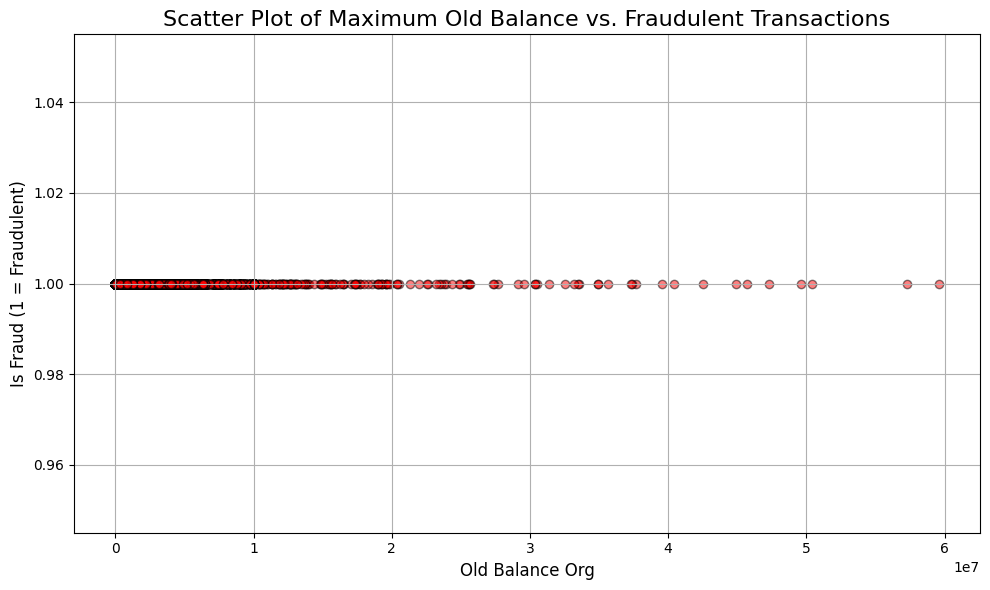

In [21]:


# Ensure to import or load your dataframe here
# df = pd.read_csv('your_data.csv')

# Filter the dataframe for fraudulent transactions
fraud_df = df[df['isFraud'] == 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fraud_df['oldbalanceOrg'], fraud_df['isFraud'], alpha=0.5, color='red', edgecolor='k')

# Add labels and title
plt.xlabel('Old Balance Org', fontsize=12)
plt.ylabel('Is Fraud (1 = Fraudulent)', fontsize=12)
plt.title('Scatter Plot of Maximum Old Balance vs. Fraudulent Transactions', fontsize=16)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/3482172073.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



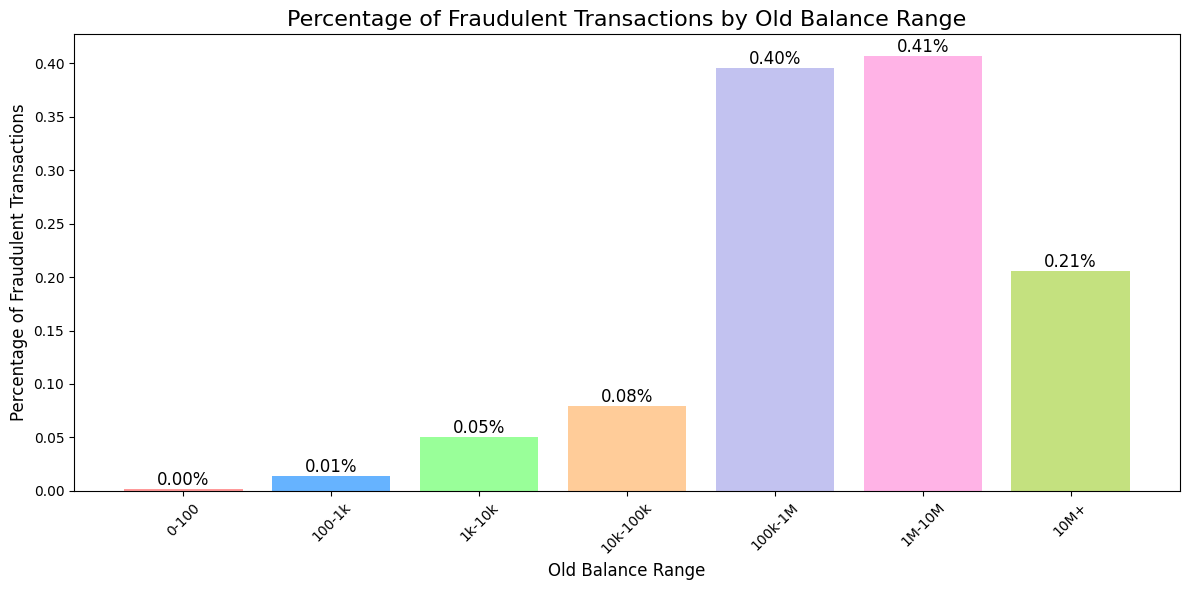

In [25]:


# Define the bins for oldbalanceOrg ranges
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # 0-100, 100-1k, ..., above 1 crore
labels = ['0-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Create a new column for the binned oldbalanceOrg
df['oldbalanceOrg_binned'] = pd.cut(df['oldbalanceOrg'], bins=bins, labels=labels, right=False)
fraud_df = df[df['isFraud'] == 1]
fraud_df['oldbalanceOrg_binned'] = pd.cut(fraud_df['oldbalanceOrg'], bins=bins, labels=labels, right=False)

# Count the total transactions and fraudulent transactions in each bin
total_by_balance = df['oldbalanceOrg_binned'].value_counts().sort_index()
fraud_by_balance = fraud_df['oldbalanceOrg_binned'].value_counts().sort_index()

# Calculate the percentage of fraudulent transactions for each bin
fraud_percentage = (fraud_by_balance / total_by_balance) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(fraud_percentage.index, fraud_percentage, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f'])

# Annotate percentages on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Old Balance Range', fontsize=12)
plt.ylabel('Percentage of Fraudulent Transactions', fontsize=12)
plt.title('Percentage of Fraudulent Transactions by Old Balance Range', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


###### **Conclusion**
- we can see maximum frudent have been done peopel having money between 1lakh to 10  lakh
- 3.5% of people having account money  above 1 crore is fraduent
- 0.41% transiction that was done between 1million to 1 crore was fraduent

##### **newbalanceorg vs isFraud**


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/3082847521.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/3082847521.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



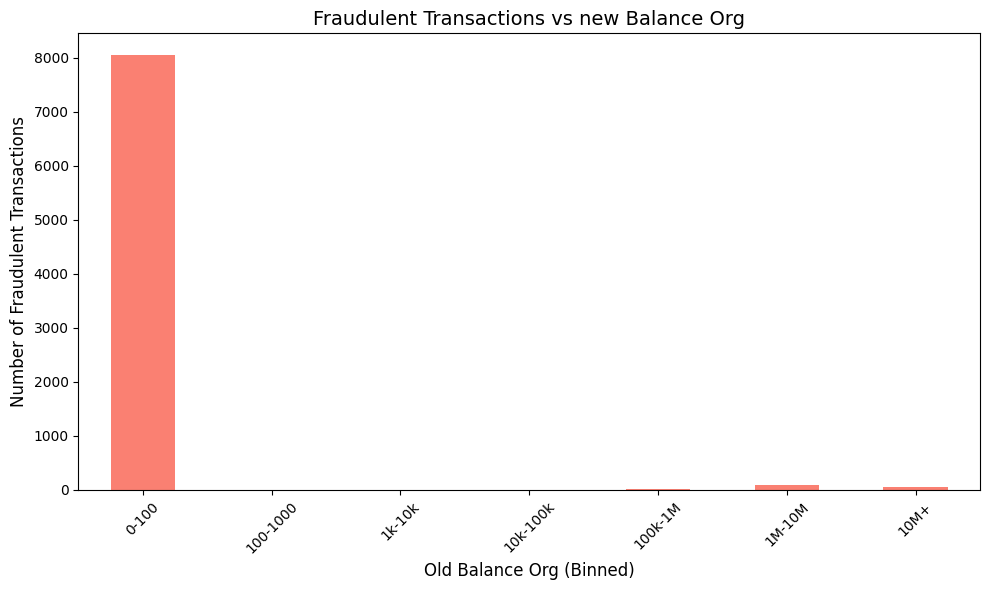

In [26]:


# Define the bin edges for 'oldbalanceOrg'
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # Define your bin edges
labels = ['0-100', '100-1000', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Filter only fraudulent transactions
fraud_df = df[df['isFraud'] == 1]

# Create a new column for the binned ranges of 'oldbalanceOrg'
fraud_df['oldbalanceOrg_binned'] = pd.cut(fraud_df['newbalanceOrig'], bins=bins, labels=labels, right=False)

# Group by the binned ranges and count the number of fraudulent transactions in each bin
fraud_by_balance = fraud_df.groupby('oldbalanceOrg_binned').size()

# Plot the bar chart
plt.figure(figsize=(10, 6))
fraud_by_balance.plot(kind='bar', color='salmon')

# Add labels and title
plt.xlabel('Old Balance Org (Binned)', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Fraudulent Transactions vs new Balance Org', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/3377591163.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



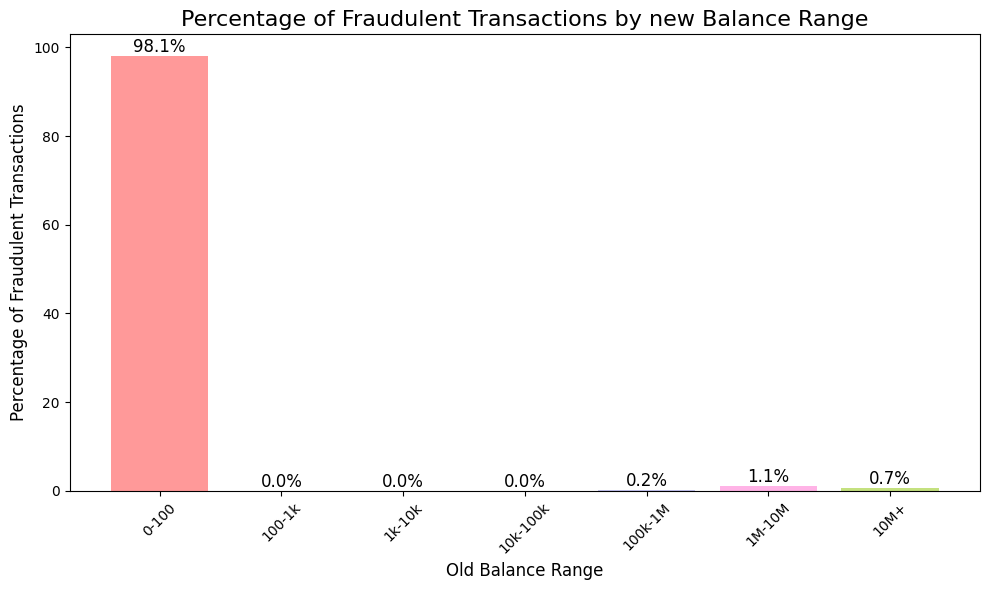

In [27]:


# Define the bins for oldbalanceOrg ranges
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # 0-100, 100-1k, ..., above 1 crore
labels = ['0-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Filter only fraudulent transactions (where isFraud == 1)
fraud_df = df[df['isFraud'] == 1]

# Create a new column for the binned oldbalanceOrg amounts
fraud_df['Old Balance Range'] = pd.cut(fraud_df['newbalanceOrig'], bins=bins, labels=labels, right=False)

# Count the number of fraudulent transactions in each bin
fraud_count_by_range = fraud_df['Old Balance Range'].value_counts().sort_index()

# Calculate the percentages
fraud_percentage_by_range = (fraud_count_by_range / fraud_count_by_range.sum()) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(fraud_count_by_range.index, fraud_percentage_by_range, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f'])

# Annotate percentages on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Old Balance Range', fontsize=12)
plt.ylabel('Percentage of Fraudulent Transactions', fontsize=12)
plt.title('Percentage of Fraudulent Transactions by new Balance Range', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [32]:
len(df[(df['isFraud'] == 1) & (df['newbalanceOrig'] == 0)])

8053

###### **conclusion**
- we can see after the fraduent transiction 98% people have money 0 in thier account


##### **nameDest vs isFraud**

In [33]:
df[df['isFraud']==1]['nameDest'].value_counts()

nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: count, Length: 8169, dtype: int64

##### **oldbalanceDest**


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/1939439686.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/1939439686.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



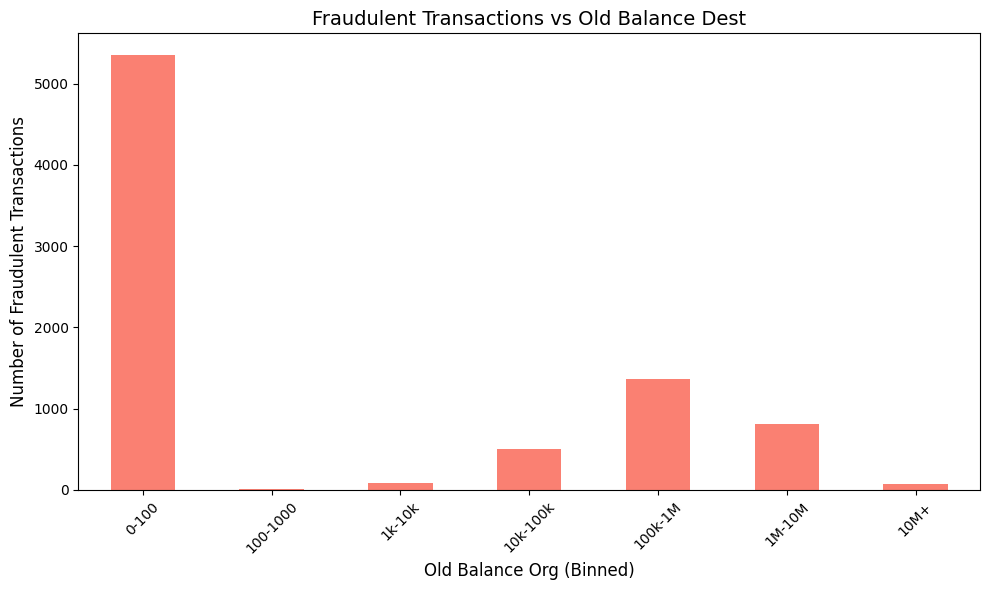

In [34]:

# Define the bin edges for 'oldbalanceOrg'
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # Define your bin edges
labels = ['0-100', '100-1000', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Filter only fraudulent transactions
fraud_df = df[df['isFraud'] == 1]

# Create a new column for the binned ranges of 'oldbalanceOrg'
fraud_df['oldbalanceOrg_binned'] = pd.cut(fraud_df['oldbalanceDest'], bins=bins, labels=labels, right=False)

# Group by the binned ranges and count the number of fraudulent transactions in each bin
fraud_by_balance = fraud_df.groupby('oldbalanceOrg_binned').size()

# Plot the bar chart
plt.figure(figsize=(10, 6))
fraud_by_balance.plot(kind='bar', color='salmon')

# Add labels and title
plt.xlabel('Old Balance Org (Binned)', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Fraudulent Transactions vs Old Balance Dest', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/1975139073.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



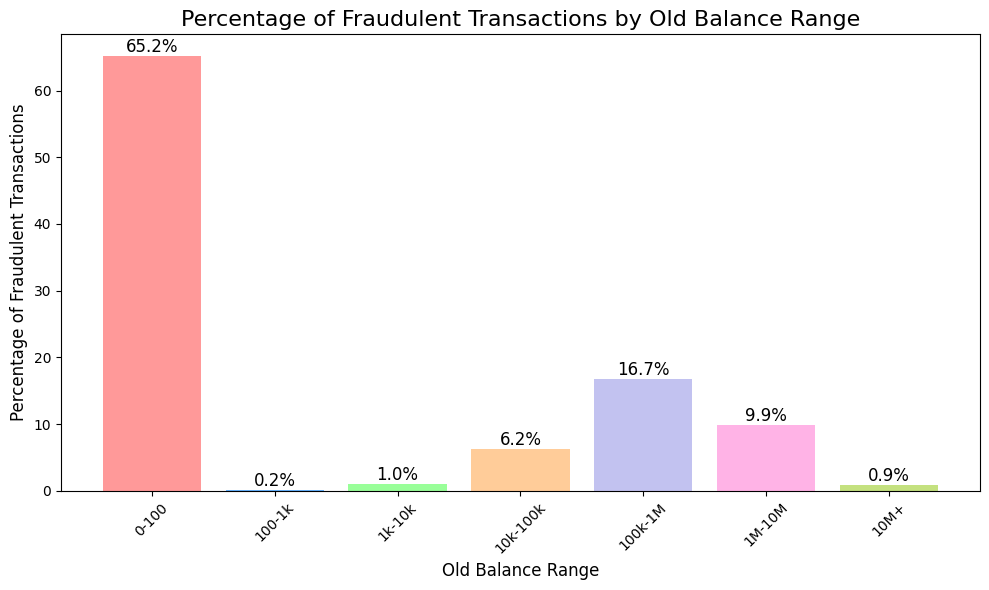

In [35]:


# Define the bins for oldbalanceOrg ranges
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]  # 0-100, 100-1k, ..., above 1 crore
labels = ['0-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M+']

# Filter only fraudulent transactions (where isFraud == 1)
fraud_df = df[df['isFraud'] == 1]

# Create a new column for the binned oldbalanceOrg amounts
fraud_df['Old Balance Range'] = pd.cut(fraud_df['oldbalanceDest'], bins=bins, labels=labels, right=False)

# Count the number of fraudulent transactions in each bin
fraud_count_by_range = fraud_df['Old Balance Range'].value_counts().sort_index()

# Calculate the percentages
fraud_percentage_by_range = (fraud_count_by_range / fraud_count_by_range.sum()) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(fraud_count_by_range.index, fraud_percentage_by_range, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f'])

# Annotate percentages on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Old Balance Range', fontsize=12)
plt.ylabel('Percentage of Fraudulent Transactions', fontsize=12)
plt.title('Percentage of Fraudulent Transactions by Old Balance Range', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [38]:
len(df[(df['isFraud'] == 1) & (df['oldbalanceDest'] ==0)])

5351

###### **Conclusion**
- maximum dest account has 0 balance in Fraduent transiction

##### **isFraud vs isFlaggedFraud**


In [42]:
(df[df['isFraud']==1]['isFlaggedFraud']==1).sum()

16

###### **Conclusion** 
- there was 16 isFlaggedFraud and out of those all were Fraud

### **Multivariate Analysis**


In [57]:
df=pd.read_csv('/Users/nitish_0184/Desktop/nptel/Fraud.csv')

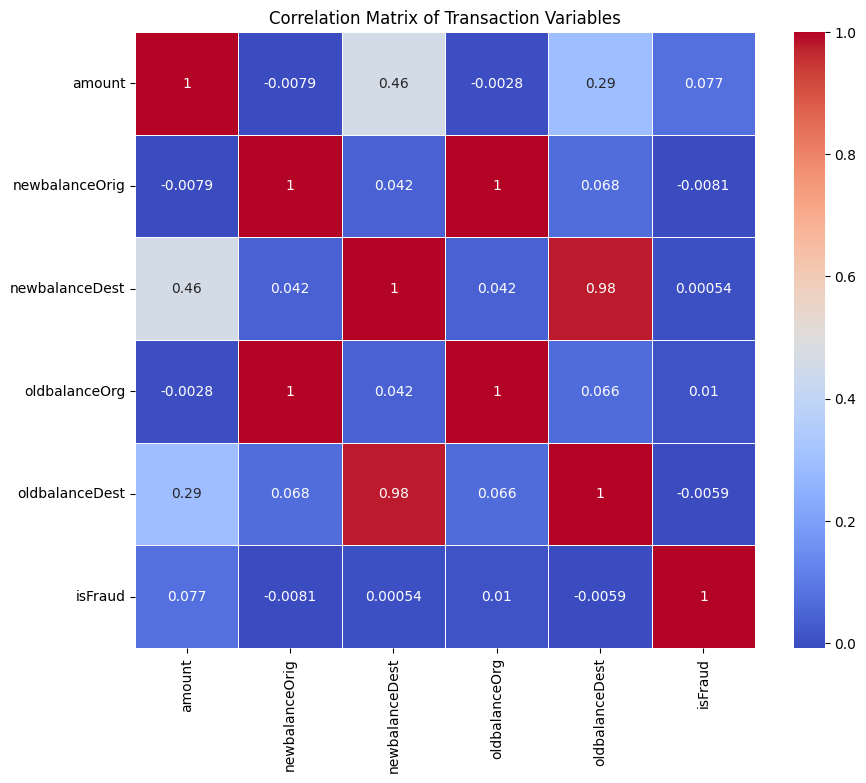

In [64]:
# matrix to represent the correlation between the different columns
# Select relevant numerical columns for correlation
corr_columns = ['amount', 'newbalanceOrig', 'newbalanceDest', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']
corr_matrix = df[corr_columns].corr()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Transaction Variables')
plt.show()


In [65]:
# Create a pivot table for fraud, type, and initial balance ranges
df['initial_balance_range'] = pd.cut(df['newbalanceOrig'], bins=[1, 100000, 1000000, 10000000, 100000000],
                                     labels=['1-1 Lakh', '1 Lakh-10 Lakh', '10 Lakh-1 Crore', '1 Crore+'])

# Summarize data by type, initial balance range, and fraud
summary_balance = df.groupby(['type', 'initial_balance_range', 'isFraud']).size().reset_index(name='count')

# Plot stacked bar chart
fig = px.bar(summary_balance, x='type', y='count', color='isFraud', barmode='stack',
             facet_col='initial_balance_range', title='Fraud by Transaction Type and Initial Balance Range')

fig.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/713568566.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [67]:
# Summarize fraud transactions by type and amount range
fraud_summary = df.groupby(['type', 'amount_range', 'isFraud']).size().reset_index(name='count')

# Filter only fraudulent transactions
fraud_summary = fraud_summary[fraud_summary['isFraud'] == 1]

# Create a stacked bar plot
fig = px.bar(fraud_summary, x='type', y='count', color='amount_range', 
             labels={'count': 'Fraud Count', 'amount_range': 'Amount Range'},
             title='Fraud Count by Transaction Type and Amount Range')

fig.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/2855809681.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



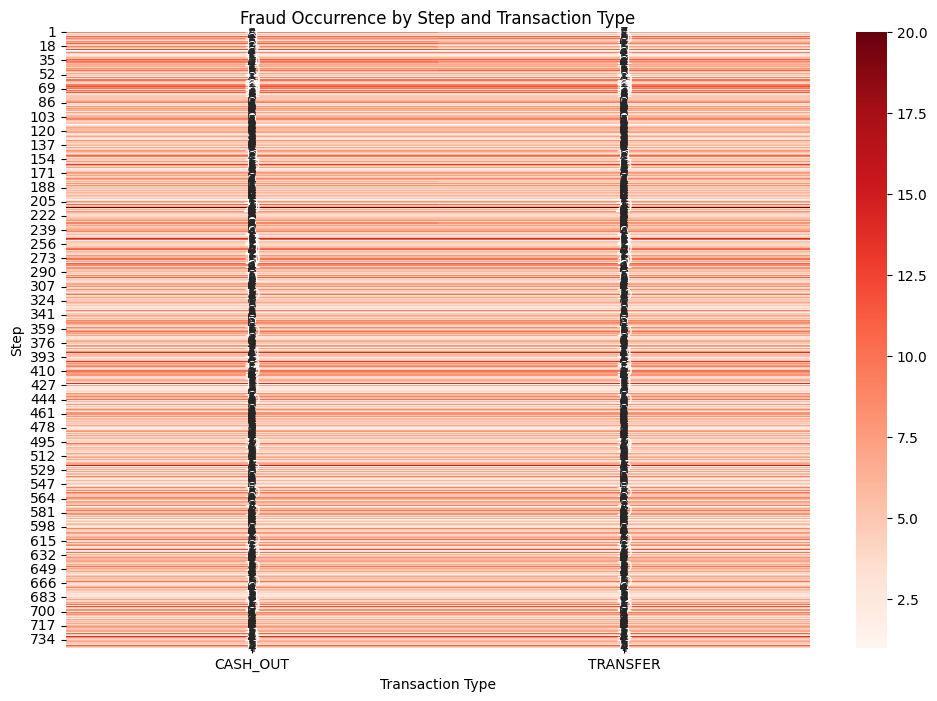

In [68]:
import seaborn as sns

# Summarize fraud occurrences by step and type
fraud_heatmap_data = df[df['isFraud'] == 1].pivot_table(index='step', columns='type', values='isFraud', aggfunc='size')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(fraud_heatmap_data, cmap='Reds', annot=True, fmt='.0f')
plt.title('Fraud Occurrence by Step and Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Step')
plt.show()


In [69]:
# Create a column for initial balance ranges
df['balance_range'] = pd.cut(df['newbalanceOrig'], bins=[1, 100000, 1000000, 10000000, 100000000],
                             labels=['1-1 Lakh', '1 Lakh-10 Lakh', '10 Lakh-1 Crore', '1 Crore+'])

# Calculate fraud probabilities
fraud_prob = df.groupby(['type', 'balance_range']).apply(lambda x: x['isFraud'].mean()).reset_index(name='fraud_prob')

# Create a bubble plot
fig = px.scatter(fraud_prob, x='type', y='balance_range', size='fraud_prob', color='fraud_prob', 
                 labels={'fraud_prob': 'Fraud Probability'}, title='Fraud Probability by Transaction Type and Balance Range')

fig.show()


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/2581504502.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_802/2581504502.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### **Data Cleaning**

In [71]:
df=pd.read_csv('/Users/nitish_0184/Desktop/nptel/Fraud.csv')

In [76]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### **issues with the datasets**
- Although datasets is almost clean but still it have few issue

##### **Drity Data**
- column step alloted int64 but the value ranges only from 0-743 it can be changed to int16
- column amount is in float64 in can be changed to float32
- column isFraud and isFlaggedFraudd should be changed into int16
- column oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest can be changed into float32

##### **messy Data**

- there is no messy data in this datasets

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [74]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [75]:
# checking for duplication
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [80]:
df['step'].dtype

dtype('int64')

In [81]:
df['amount'].dtype

dtype('float64')

In [83]:
df['step']=df['step'].astype('int16')

In [84]:
df['amount']=df['amount'].astype('float32')

In [ ]:
df['oldbalanceOrg']=df['oldbalanceOrg'].astype('float32')

### **Featue Engineering**

##### * How will we proceed** 
- we have found in univariate analysis of step columns , that in a particular range of columns like 320-360 maximum fraud transiction have been done , so
we will create bins of step column
- Similarly for amount one additional column we will add , because we have seen maximum fraud have been in between 1lakh to 10 lakh

In [6]:
import numpy as np
import pandas as pd
data=pd.read_csv('/Users/nitish_0184/Desktop/nptel/Fraud.csv')
df=data.copy()

In [7]:

# creating bins for step column

# Create bins for the 'step' column
bins = np.arange(0, 740 + 10, 10)  # Bins of size 10 from 0 to 740
labels = [f'{i}-{i+10}' for i in bins[:-1]]  # Labels like '0-10', '10-20', etc.

# Bin the 'step' column
df['step_binned'] = pd.cut(df['step'], bins=bins, labels=labels, right=False)

# Check the result
print(df[['step', 'step_binned']].head())


   step step_binned
0     1        0-10
1     1        0-10
2     1        0-10
3     1        0-10
4     1        0-10


In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_binned
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0-10
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0-10
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0-10
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0-10
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0-10


In [10]:

# counting the no of transiction 

# Count the number of transactions in each 'step_binned'
transaction_counts = df['step_binned'].value_counts().sort_index()

# Create a DataFrame for ranking
rank_df = pd.DataFrame({
    'step_binned': transaction_counts.index,
    'transaction_count': transaction_counts.values
})

# Rank bins based on transaction counts in descending order
rank_df['Rank'] = rank_df['transaction_count'].rank(ascending=False, method='dense').astype(int)

# Normalize ranks to the range of 0 to 100
max_rank = rank_df['Rank'].max()
rank_df['Rank'] = 100 * (rank_df['Rank'] - 1) / (max_rank - 1)  # Adjust ranks to be within 0-100
rank_df['Rank'] = rank_df['Rank'].astype(int)  # Ensure ranks are integers

# Merge ranks back to the original DataFrame
df = df.merge(rank_df[['step_binned', 'Rank']], on='step_binned', how='left')

# Remove rows with NaN values in the 'Rank' column
df = df.dropna(subset=['Rank'])

# Replace 'step' column with 'Rank' for encoding
df['step'] = df['Rank']



# Check the result
print(df[['step_binned', 'step']].head())


  step_binned  step
0        0-10  38.0
1        0-10  38.0
2        0-10  38.0
3        0-10  38.0
4        0-10  38.0


In [42]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_binned,Rank
0,38.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0-10,38.0
1,38.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0-10,38.0
2,38.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0-10,38.0
3,38.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0-10,38.0
4,38.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0-10,38.0


In [11]:
df=df.drop(columns='Rank')

In [54]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_binned
0,38.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0-10
1,38.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0-10
2,38.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0-10
3,38.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0-10
4,38.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0-10


In [12]:
# Encoding type column with ordinal encoing

type_mapping = {'CASH_OUT': 5, 'PAYMENT': 4, 'CASH_IN': 3, 'TRANSFER': 2, 'DEBIT': 1}
df['type_encoded'] = df['type'].map(type_mapping)

# Check the result
print(df[['type', 'type_encoded']].head())


       type  type_encoded
0   PAYMENT             4
1   PAYMENT             4
2  TRANSFER             2
3  CASH_OUT             5
4   PAYMENT             4


In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_binned,type_encoded
0,38.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0-10,4
1,38.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0-10,4
2,38.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0-10,2
3,38.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0-10,5
4,38.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0-10,4


In [14]:
df['type']=df['type_encoded']
df.drop(columns='type_encoded')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_binned
0,38.0,4,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0-10
1,38.0,4,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0-10
2,38.0,2,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0-10
3,38.0,5,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0-10
4,38.0,4,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...
6362565,94.0,5,156691.56,C1179416232,156691.56,0.00,C738050575,842252.15,998943.71,1,0,730-740
6362566,94.0,2,8116.53,C2072430566,8116.53,0.00,C765215468,0.00,0.00,1,0,730-740
6362567,94.0,5,8116.53,C564539602,8116.53,0.00,C1935865739,7638.26,15754.79,1,0,730-740
6362568,94.0,2,194521.28,C1696012302,194521.28,0.00,C411128068,0.00,0.00,1,0,730-740


In [15]:
df['step'].astype('int16')

0          38
1          38
2          38
3          38
4          38
           ..
6362565    94
6362566    94
6362567    94
6362568    94
6362569    94
Name: step, Length: 6362570, dtype: int16

In [58]:
# making another range of money 
import pandas as pd
import numpy as np

# Example DataFrame creation
# df = pd.read_csv('your_dataset.csv')  # Load your dataset here

# Define the bins for the 'amount' column
bins = [
    0, 100, 1000, 10000, 50000, 100000, 500000, 1000000, 
    2500000, 50000000, 75000000, 100000000, 500000000
]
labels = [
    '0-100', '100-1,000', '1,000-10,000', '10,000-50,000', 
    '50,000-100,000', '100,000-500,000', '500,000-1,000,000', 
    '1,000,000-2,500,000', '2,500,000-50,000,000', '50,000,000-75,000,000', 
    '75,000,000-100,000,000', '100,000,000-500,000,000'
]

# Apply binning to the 'amount' column
df['amount_binned'] = pd.cut(df['amount'], bins=bins, labels=labels, right=False)

# Check the result
print(df[['amount', 'amount_binned']].head())

# Count the number of fraudulent transactions in each bin
fraud_counts = df[df['isFraud'] == 1].groupby('amount_binned').size().reset_index(name='Fraudulent Transactions')

# Rank the bins based on fraudulent transaction counts
fraud_counts['Rank'] = fraud_counts['Fraudulent Transactions'].rank(ascending=False, method='dense').astype(int)

# Normalize ranks to the range of 0 to 100
max_rank = fraud_counts['Rank'].max()
fraud_counts['Rank'] = 100 * (fraud_counts['Rank'] - 1) / (max_rank - 1)  # Adjust ranks to be within 0-100
fraud_counts['Rank'] = fraud_counts['Rank'].astype(int)  # Ensure ranks are integers

# Merge the ranks back to the original DataFrame
df = df.merge(fraud_counts[['amount_binned', 'Rank']], on='amount_binned', how='left')

# Fill NaN values with the minimum rank for bins with no fraudulent transactions
df['Rank'].fillna(df['Rank'].min(), inplace=True)

# Drop the intermediate columns if needed
df = df.drop(columns=['amount_binned'])

# Verify the result
print(df.head())


     amount  amount_binned
0   9839.64   1,000-10,000
1   1864.28   1,000-10,000
2    181.00      100-1,000
3    181.00      100-1,000
4  11668.14  10,000-50,000


/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_71230/1049606713.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = df[df['isFraud'] == 1].groupby('amount_binned').size().reset_index(name='Fraudulent Transactions')
/var/folders/lf/j6h2658n0pbc7689c8qdwdc00000gn/T/ipykernel_71230/1049606713.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inpl

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0  38.0     4   9839.64  C1231006815       170136.0       160296.36   
1  38.0     4   1864.28  C1666544295        21249.0        19384.72   
2  38.0     2    181.00  C1305486145          181.0            0.00   
3  38.0     5    181.00   C840083671          181.0            0.00   
4  38.0     4  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0        0               0   
1  M2044282225             0.0             0.0        0               0   
2   C553264065             0.0             0.0        1               0   
3    C38997010         21182.0             0.0        1               0   
4  M1230701703             0.0             0.0        0               0   

  step_binned  type_encoded  Rank  
0        0-10             4    66  
1        0-10             4    66  
2        0-10 

In [59]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_binned,type_encoded,Rank
0,38.0,4,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0-10,4,66
1,38.0,4,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0-10,4,66
2,38.0,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0-10,2,77
3,38.0,5,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0-10,5,77
4,38.0,4,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0-10,4,44


In [16]:
df=df.drop(columns='type_encoded')

In [17]:
df.rename(columns={'Rank':'Money_rank'})

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_binned
0,38.0,4,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0-10
1,38.0,4,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0-10
2,38.0,2,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0-10
3,38.0,5,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0-10
4,38.0,4,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...
6362565,94.0,5,156691.56,C1179416232,156691.56,0.00,C738050575,842252.15,998943.71,1,0,730-740
6362566,94.0,2,8116.53,C2072430566,8116.53,0.00,C765215468,0.00,0.00,1,0,730-740
6362567,94.0,5,8116.53,C564539602,8116.53,0.00,C1935865739,7638.26,15754.79,1,0,730-740
6362568,94.0,2,194521.28,C1696012302,194521.28,0.00,C411128068,0.00,0.00,1,0,730-740


In [18]:
# encoding nameOrig column
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'nameOrig' column
df['nameOrig_encoded'] = label_encoder.fit_transform(df['nameOrig'])

# Check the result
print(df[['nameOrig', 'nameOrig_encoded']].head())


      nameOrig  nameOrig_encoded
0  C1231006815            757857
1  C1666544295           2188977
2  C1305486145           1002142
3   C840083671           5828218
4  C2048537720           3445951


In [19]:
#Encoding nameDest column
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'nameOrig' column
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])



In [64]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_binned,Rank,nameOrig_encoded
0,38.0,4,9839.64,C1231006815,170136.0,160296.36,1662061,0.0,0.0,0,0,0-10,66,757857
1,38.0,4,1864.28,C1666544295,21249.0,19384.72,1733891,0.0,0.0,0,0,0-10,66,2188977
2,38.0,2,181.00,C1305486145,181.0,0.00,439658,0.0,0.0,1,0,0-10,77,1002142
3,38.0,5,181.00,C840083671,181.0,0.00,391672,21182.0,0.0,1,0,0-10,77,5828218
4,38.0,4,11668.14,C2048537720,41554.0,29885.86,828886,0.0,0.0,0,0,0-10,44,3445951


In [20]:
df['nameOrig']=df['nameOrig_encoded']
df=df.drop(columns='nameOrig_encoded')

In [67]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_binned,Rank
0,38.0,4,9839.64,757857,170136.0,160296.36,1662061,0.0,0.0,0,0,0-10,66
1,38.0,4,1864.28,2188977,21249.0,19384.72,1733891,0.0,0.0,0,0,0-10,66
2,38.0,2,181.00,1002142,181.0,0.00,439658,0.0,0.0,1,0,0-10,77
3,38.0,5,181.00,5828218,181.0,0.00,391672,21182.0,0.0,1,0,0-10,77
4,38.0,4,11668.14,3445951,41554.0,29885.86,828886,0.0,0.0,0,0,0-10,44


In [21]:
df=df.drop(columns='step_binned')

### **model Training**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import xgboost as xgb
import joblib  # Library for saving the model

# Assuming df is your DataFrame and has been preprocessed
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print(f"XGBoost:\n Accuracy: {accuracy:.4f}\n Precision: {precision:.4f}\n Recall: {recall:.4f}\n")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model to a file
model_filename = 'xgboost_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")


XGBoost:
 Accuracy: 0.9998
 Precision: 0.9574
 Recall: 0.8435

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906317
           1       0.96      0.84      0.90      2454

    accuracy                           1.00   1908771
   macro avg       0.98      0.92      0.95   1908771
weighted avg       1.00      1.00      1.00   1908771

Model saved to xgboost_model.pkl


### **Overall conclusion**
-  Highly Imblance Datasets
-  precision should be high in these type of problem 
-  out of 6362620 rows only 8231 having isFraud value equal to 1 
-  maximum no of transiction have been done between step 150-350
-  maximum 35% transiction was done through cash_out followed by 33% through payment
-  maximum transiction amount was 92445516.64
-  maximum no of transiction was between 1000-100000 followed by 1 lakh to 1 million
-  maximum user have balance in between 1 thousand to 1 lakh followed by 1 lakh to 1 million
-  140828 user have money more than 1 crore in thier account
-  maximum total amount of transiction was done between step 320-360
-  maximum no of fraduent have been in range of step 380-420
-  maximum no of fraduent have been in transiction range of 1 lakh to 10 lakh
-  maximum possibility of fraud is in transiction above 1 crore 0.5%
-  our Xgboost model was able to gain accuracy upto 99.99 % with a precision score of 97%


